# Plots and Post-Training Analysis

In [1]:
LIBRARY='rdkit'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm import tqdm
import pickle
from IPython.display import clear_output

In [3]:
SMALL_SIZE = 20
MEDIUM_SIZE = 25
BIGGER_SIZE = 30

mpl.rcParams['axes.grid'] = True
mpl.rcParams['figure.figsize']=(16,9)
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

In [4]:
with open('../DATA_train.pkl', 'rb') as file:
    data_train=pickle.load(file)
with open('../DATA_test.pkl', 'rb') as file:
    data_test=pickle.load(file)

X_train=data_train.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','rdkit_mol'])
X_test=data_test.drop(columns=['Sr. No.','FG_name','FG Position','Redox Potential','mol_filename_neutral','rdkit_mol'])
y_train=data_train['Redox Potential']
y_test=data_test['Redox Potential']

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(129, 4719) (129,)
(56, 4719) (56,)


In [5]:
def getDataFromFile(file_name):
    try:
        with open(file_name, 'rb') as file:
            print('File Found')
            return pickle.load(file)
    except FileNotFoundError:
        print('File Not Found, performe the whole process...')
        return None

# Describe

In [6]:
df=pd.read_csv('DESCRIBE_X_train_scaled.csv').set_index('stat')
df

,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,FG_position_4_2d_basic,FG_position_6_2d_basic,FG_position_7_2d_basic,FG_position_8_2d_basic,FG_position_9_2d_basic,MaxEStateIndex_2d_rdkit,...,rdkit_fp_2035,rdkit_fp_2036,rdkit_fp_2037,rdkit_fp_2038,rdkit_fp_2039,rdkit_fp_2042,rdkit_fp_2043,rdkit_fp_2044,rdkit_fp_2046,rdkit_fp_2047
stat,,,,,,,,,,,,,,,,,,,,,
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,1.290000e+02,...,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.0,129.000000,129.000000,129.000000
mean,11.930233,0.790698,0.604651,0.395349,0.178295,0.255814,0.333333,0.255814,0.224806,4.406467e-16,...,0.046512,0.007752,0.713178,0.046512,0.007752,0.395349,0.0,0.364341,0.279070,0.007752
std,4.361024,0.408397,0.490832,0.490832,0.384253,0.438019,0.473242,0.438019,0.419082,1.003899e+00,...,0.211411,0.088045,0.454041,0.211411,0.088045,0.490832,0.0,0.483121,0.450291,0.088045
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.666913e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.061874e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.724648e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,15.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,5.963170e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.0,1.000000,1.000000,0.000000
max,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.237553e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='mean'>

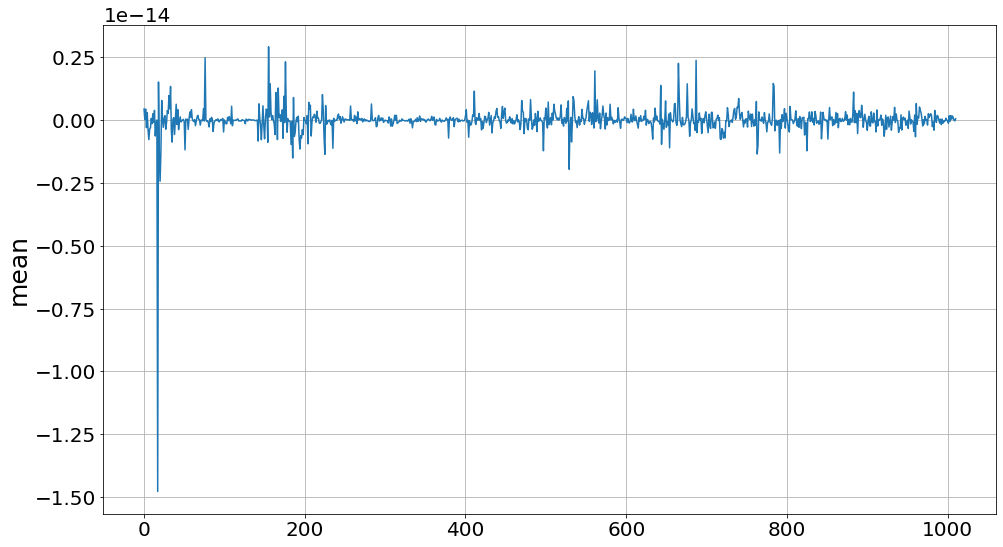

In [7]:
numerical_cols=[col for col in df.columns if '_2d_rdkit' in col]
numerical_cols+=[col for col in df.columns if '_3d_rdkit' in col]
df=df[numerical_cols]
sns.lineplot(y=df.loc['mean',:],x=np.arange(len(df.columns)))

In [8]:
df=pd.read_csv('DESCRIBE_X_test_scaled.csv').set_index('stat')
df

,FG_no_2d_basic,FG_position_1_2d_basic,FG_position_2_2d_basic,FG_position_3_2d_basic,FG_position_4_2d_basic,FG_position_6_2d_basic,FG_position_7_2d_basic,FG_position_8_2d_basic,FG_position_9_2d_basic,MaxEStateIndex_2d_rdkit,...,rdkit_fp_2035,rdkit_fp_2036,rdkit_fp_2037,rdkit_fp_2038,rdkit_fp_2039,rdkit_fp_2042,rdkit_fp_2043,rdkit_fp_2044,rdkit_fp_2046,rdkit_fp_2047
stat,,,,,,,,,,,,,,,,,,,,,
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,...,56.000000,56.0,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000
mean,11.946429,0.732143,0.589286,0.339286,0.339286,0.214286,0.232143,0.196429,0.142857,0.064425,...,0.125000,0.0,0.642857,0.160714,0.035714,0.410714,0.035714,0.357143,0.232143,0.053571
std,4.959544,0.446850,0.496416,0.477752,0.477752,0.414039,0.426021,0.400892,0.353094,1.048329,...,0.333712,0.0,0.483494,0.370591,0.187256,0.496416,0.187256,0.483494,0.426021,0.227208
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.661671,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.063351,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,14.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.417125,...,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.037272,...,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.409553,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='mean'>

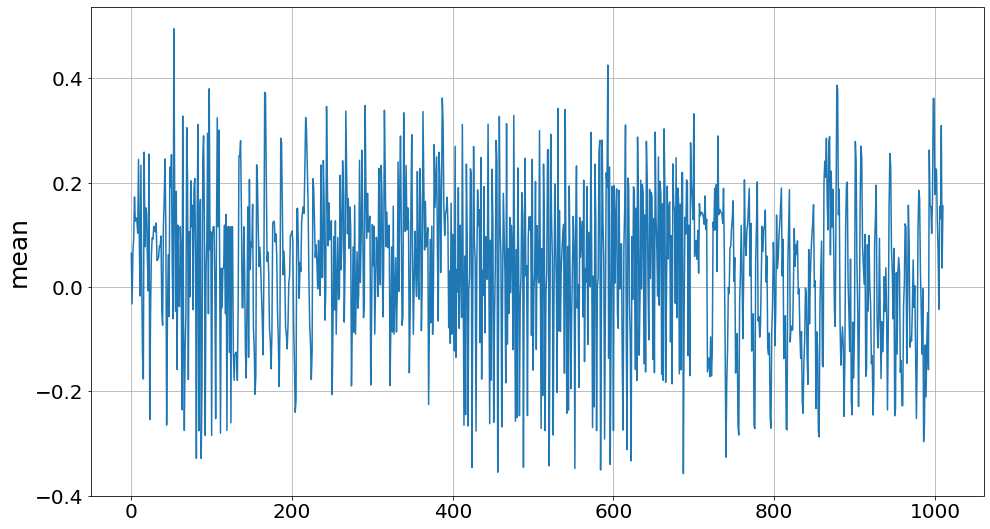

In [9]:
numerical_cols=[col for col in df.columns if '_2d_rdkit' in col]
numerical_cols+=[col for col in df.columns if '_3d_rdkit' in col]
df=df[numerical_cols]
sns.lineplot(y=df.loc['mean',:],x=np.arange(len(df.columns)))

In [44]:
file_name=f'MODEL_PERFORMANCE_DF_2d+3d+fp_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,2d+3d+fp_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.14142060279846191, 0.154308319...",0.968083,0.009708,0.062823,1.000000,2.334106e-30,1.113047e-15,0.989772,0.004169,0.042151,"[-0.5799999999999937, -1.8699999999999997, -1....","[-1.6010139961165957, -2.248286582838187, -0.6..."
1,2d+3d+fp_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=5000, solver='saga')","{'alpha': 1.5, 'max_iter': 5000, 'solver': 'sa...","{'fit_time': [3.8680825233459473, 3.5826566219...",0.973266,0.007766,0.055787,0.998680,6.374300e-04,1.613212e-02,0.991286,0.003552,0.039159,"[-0.5986321537764605, -1.845142478443837, -1.3...","[-1.6037680800963638, -2.240615718104971, -0.6..."
2,2d+3d+fp_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=200, positive=True)","{'alpha': 0.01, 'max_iter': 200, 'positive': T...","{'fit_time': [0.13209843635559082, 0.237755060...",0.980708,0.005787,0.055394,0.992954,3.401937e-03,4.297650e-02,0.990779,0.003758,0.047393,"[-0.6030660767482522, -1.844123584335192, -1.3...","[-1.5144248061492083, -2.17215109435767, -0.69..."
3,2d+3d+fp_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.22015810012817383, 0.180590391...",0.911817,0.031395,0.144293,0.951309,2.350735e-02,1.276061e-01,0.935005,0.026491,0.138904,"[-0.7430103027373084, -1.7675425164299052, -1....","[-1.5167128827464031, -1.9187279708487472, -0...."
4,2d+3d+fp_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.0632321834564209, 0.0524141788...",0.933680,0.024419,0.127584,0.952211,2.307195e-02,1.238846e-01,0.940524,0.024242,0.129771,"[-0.7063253205775352, -1.7647783163780975, -1....","[-1.5903850212523705, -1.94458819686808, -0.84..."
5,2d+3d+fp_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.07396697998046875, 0.100767850...",0.103019,0.365260,0.225831,1.000000,1.264036e-29,2.254898e-15,0.938386,0.025113,0.119003,"[-0.5800000000000007, -1.8700000000000048, -1....","[-1.5570230366173643, -2.256478326230281, -0.5..."
6,2d+3d+fp_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","{'fit_time': [0.7413012981414795, 1.0354070663...",0.971494,0.008480,0.057867,0.999283,3.463749e-04,1.170593e-02,0.991654,0.003402,0.038116,"[-0.5902395477691504, -1.850201346727125, -1.3...","[-1.596677029166602, -2.236724629745552, -0.65..."
7,2d+3d+fp_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(lambda_1=1e-07, n_iter=200)","{'alpha_1': 1e-06, 'lambda_1': 1e-07, 'n_iter'...","{'fit_time': [0.9188745021820068, 1.6390917301...",0.973846,0.007921,0.057448,0.999939,2.965003e-05,3.926575e-03,0.979750,0.008253,0.056587,"[-0.5689871878931704, -1.8766339043071296, -1....","[-1.5353492444817052, -2.263711032068989, -0.6..."
8,2d+3d+fp_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(C=0.5, max_iter=150...","{'C': 0.5, 'max_iter': 1500, 'tol': 1e-07}","{'fit_time': [0.16043615341186523, 0.149175405...",0.875961,0.033008,0.108104,0.991256,4.221272e-03,5.593183e-02,0.961383,0.015740,0.099066,"[-0.5703458001435279, -1.7920920552040207, -1....","[-1.7010659088914193, -2.2098678475910964, -0...."
9,2d+3d+fp_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...","HuberRegressor(alpha=0.001, epsilon=1, max_ite...","{'

Text(0.5, 1.0, 'ridge')

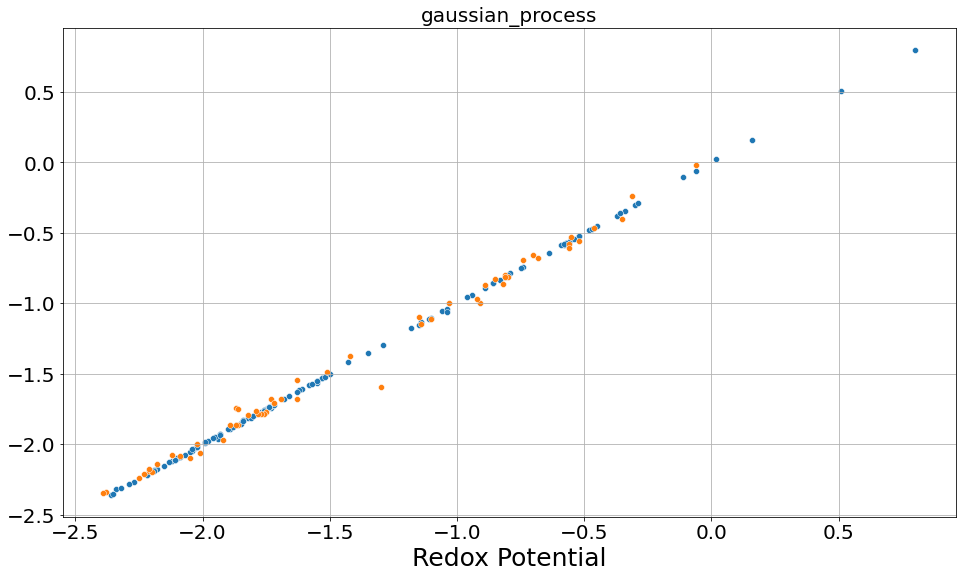

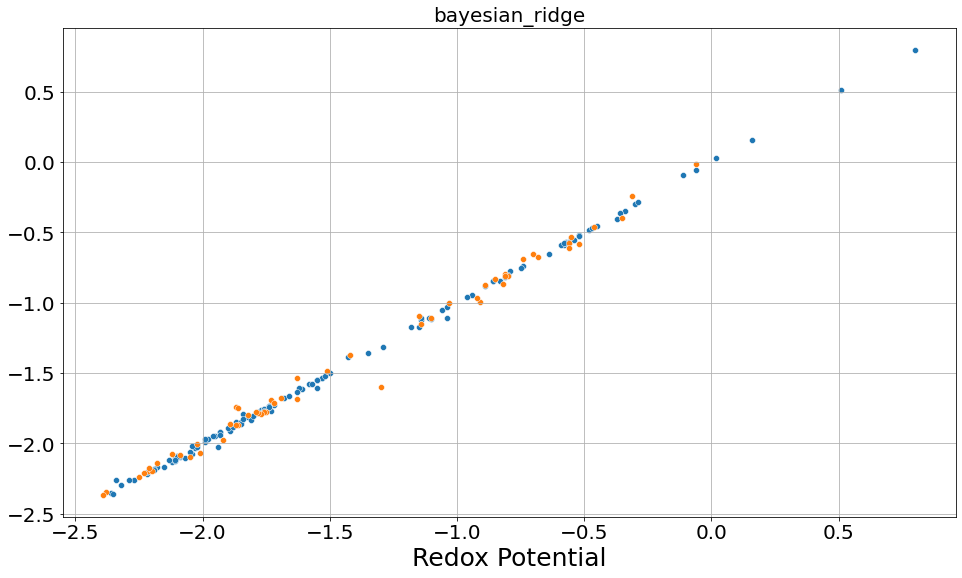

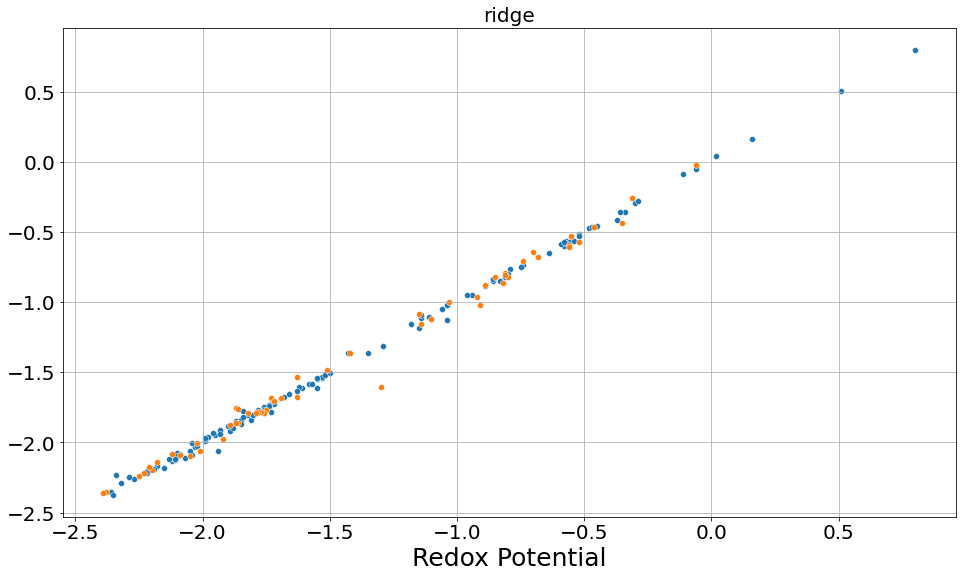

In [43]:
ntop=0
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

plt.figure()
ntop=1
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

plt.figure()
ntop=2
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

In [45]:
file_name=f'MODEL_PERFORMANCE_DF_2d_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,2d_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.014342308044433594, 0.00674891...",-4619.866991,2279.078557,7.451300,0.998445,7.507902e-04,0.017070,-18.759002,8.053446,0.758717,"[-0.5961376940634562, -1.9200086194027186, -1....","[-1.5714077141977487, -2.285550998671761, -0.6..."
1,2d_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1, max_iter=5000, solver='saga')","{'alpha': 1, 'max_iter': 5000, 'solver': 'saga...","{'fit_time': [0.13265705108642578, 0.146465301...",0.980422,0.005693,0.049595,0.995937,1.961672e-03,0.029567,0.989846,0.004139,0.046829,"[-0.5609859214492362, -1.8297686756511862, -1....","[-1.5040798026959457, -2.283750807013049, -0.7..."
2,2d_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=500)","{'alpha': 0.01, 'max_iter': 500, 'positive': F...","{'fit_time': [0.016596317291259766, 0.01570010...",0.972901,0.008119,0.065655,0.990568,4.553774e-03,0.051020,0.985097,0.006074,0.060769,"[-0.5720210868196495, -1.7911356132905523, -1....","[-1.5855232966206019, -2.1852674809694594, -0...."
3,2d_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=500)","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.010986804962158203, 0.01175355...",0.890823,0.037644,0.160437,0.933181,3.225945e-02,0.150003,0.911858,0.035925,0.162825,"[-0.7218517760138226, -1.720812453786218, -1.4...","[-1.5763931630201944, -1.998025688327709, -0.9..."
4,2d_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.009049415588378906, 0.00870132...",0.921600,0.027916,0.141449,0.944441,2.682305e-02,0.141261,0.924946,0.030591,0.152557,"[-0.6960737723829711, -1.7387794316590726, -1....","[-1.6780666675279297, -1.9904986505425069, -0...."
5,2d_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.012268304824829102, 0.00516676...",0.976571,0.007079,0.061821,0.994029,2.882518e-03,0.038741,0.988121,0.004842,0.051158,"[-0.5384544880250751, -1.8150244337245298, -1....","[-1.4976978141382336, -2.23401521878555, -0.75..."
6,2d_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","{'fit_time': [0.014922380447387695, 0.01721382...",0.978234,0.006158,0.050219,0.996141,1.863045e-03,0.028785,0.989668,0.004211,0.047042,"[-0.5679198892761177, -1.834966611327665, -1.3...","[-1.5022374247371382, -2.2846279411688144, -0...."
7,2d_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(n_iter=200, tol=0.01)","{'alpha_1': 1e-06, 'lambda_1': 1e-06, 'n_iter'...","{'fit_time': [0.06574892997741699, 0.054470062...",0.983003,0.005391,0.051963,0.996280,1.796079e-03,0.030490,0.985226,0.006022,0.056265,"[-0.5517769437716824, -1.8433102369166228, -1....","[-1.5264830924396977, -2.2768009100401976, -0...."
8,2d_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(C=0.6, tol=1e-07)","{'C': 0.6, 'max_iter': 1000, 'tol': 1e-07}","{'fit_time': [0.009280204772949219, 0.00645613...",0.671033,0.076502,0.162526,0.968507,1.520424e-02,0.102607,0.907189,0.037828,0.137361,"[-0.49250520577355483, -1.6387207102368915, -1...","[-1.449313277524681, -2.1740856611733714, -0.4..."
9,2d_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...","HuberRegressor(epsilon=1, max_iter=50000)","{'alpha': 0.0001, 'epsilon': 1, 'max_iter': 50...","{'fit_time': [0.32857227325439453, 0.488717555...",0.625262,0.083221,0.12

Text(0.5, 1.0, 'kernel_ridge')

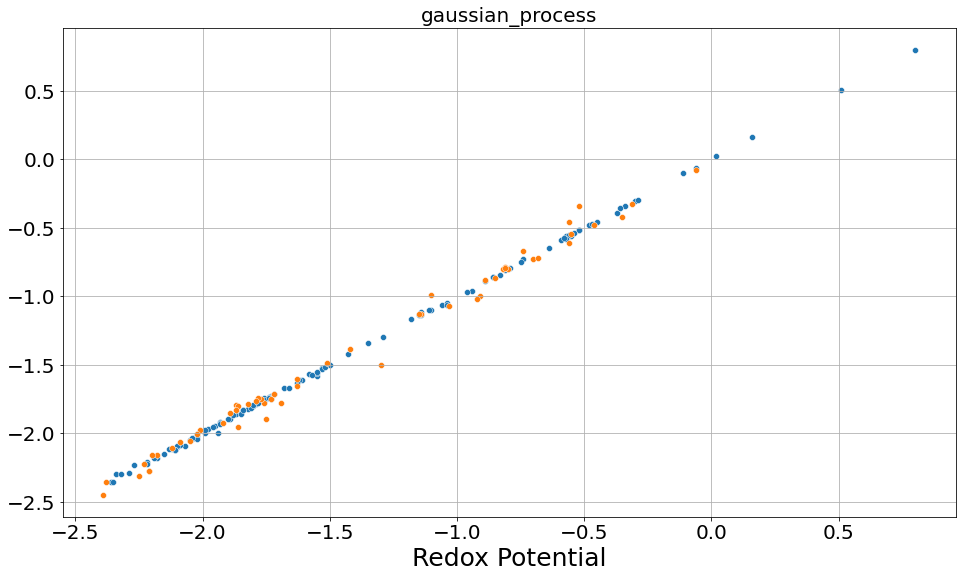

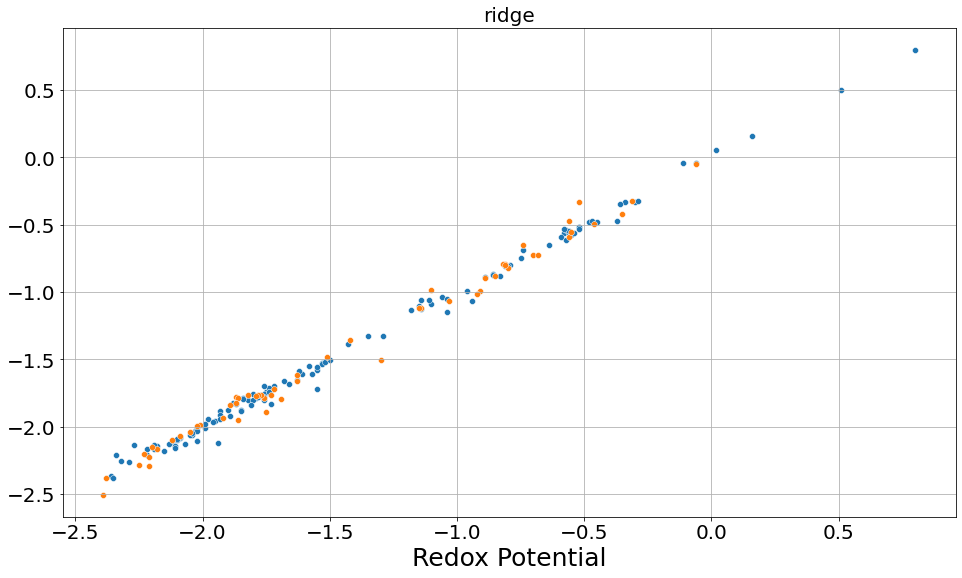

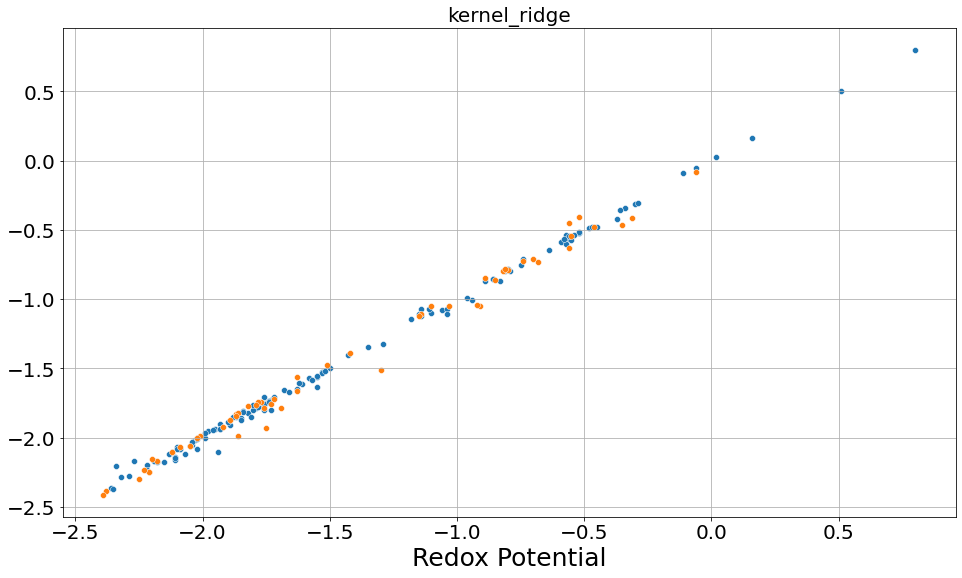

In [46]:
ntop=0
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

plt.figure()
ntop=1
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

plt.figure()
ntop=2
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

In [47]:
file_name=f'MODEL_PERFORMANCE_DF_3d_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,3d_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...","LinearRegression(normalize=True, positive=True)","{'fit_intercept': True, 'normalize': True, 'po...","{'fit_time': [0.10984921455383301, 0.090577840...",-10.571248,5.569661,0.953498,0.999248,0.000363,0.012783,0.665730,0.136243,0.238277,"[-0.5610627400616879, -1.8924636598063618, -1....","[-1.5451365032050501, -2.223860743839545, -0.2..."
1,3d_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1, max_iter=500, solver='saga')","{'alpha': 1, 'max_iter': 500, 'solver': 'saga'...","{'fit_time': [1.0824360847473145, 0.8694679737...",0.967669,0.009606,0.066130,0.996356,0.001759,0.028481,0.989629,0.004227,0.044545,"[-0.593868973301578, -1.8344660715202061, -1.2...","[-1.5857143839515695, -2.2202888927103177, -0...."
2,3d_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'max_iter': 100, 'positive': F...","{'fit_time': [0.017089128494262695, 0.01584482...",0.973638,0.007802,0.061444,0.991512,0.004098,0.045034,0.984673,0.006247,0.061257,"[-0.6302929134594936, -1.844278637816038, -1.2...","[-1.5446529802431679, -2.15016197011461, -0.63..."
3,3d_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, tol=1e-05)","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 10...","{'fit_time': [0.044638633728027344, 0.04082560...",0.910805,0.032160,0.143337,0.949289,0.024482,0.127694,0.935190,0.026415,0.134386,"[-0.781338902331636, -1.7607076719463022, -1.3...","[-1.5076284113111451, -1.8813500739702935, -0...."
4,3d_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.024571895599365234, 0.01600885...",0.919890,0.027113,0.134459,0.946046,0.026048,0.131297,0.922131,0.031738,0.144176,"[-0.7689512342850255, -1.7554031429066188, -1....","[-1.5144645520453057, -1.8926014848635324, -0...."
5,3d_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.022620201110839844, 0.02659177...",0.679864,0.096496,0.185540,0.999489,0.000247,0.011223,0.948825,0.020858,0.103226,"[-0.5851531518426011, -1.881717824431657, -1.2...","[-1.4671340622191857, -2.2426769978056376, -0...."
6,3d_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","{'fit_time': [0.05644941329956055, 0.047688722...",0.968931,0.009200,0.064318,0.996758,0.001565,0.026075,0.990503,0.003871,0.042807,"[-0.5933610720360494, -1.8340053746722706, -1....","[-1.5650510913667979, -2.210824788948921, -0.6..."
7,3d_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(lambda_1=1e-05, n_iter=200, tol=...","{'alpha_1': 1e-06, 'lambda_1': 1e-05, 'n_iter'...","{'fit_time': [0.2651102542877197, 0.1960341930...",0.966068,0.010951,0.076286,0.999513,0.000235,0.010901,0.979371,0.008408,0.066633,"[-0.5619944900819459, -1.8621857219327829, -1....","[-1.4628551102908416, -2.3078229593369937, -0...."
8,3d_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(max_iter=1500, tol=...","{'C': 1.0, 'max_iter': 1500, 'tol': 1e-07}","{'fit_time': [0.0402681827545166, 0.0347943305...",-2.960848,1.855780,0.680070,0.987959,0.005813,0.069065,0.973810,0.010675,0.084138,"[-0.5070503035580283, -1.7700000596193042, -1....","[-1.5544813311140757, -2.0855264329864642, -0...."
9,3d_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...","HuberRegressor(epsilon=1.5, max_iter=50000)","{'alpha': 0.0001, 'epsilon': 1.5, 'max_iter': ...","{'fit_time': [7.470569372177124, 7.00042963027...",-1.002525,0.8728

Text(0.5, 1.0, 'ridge')

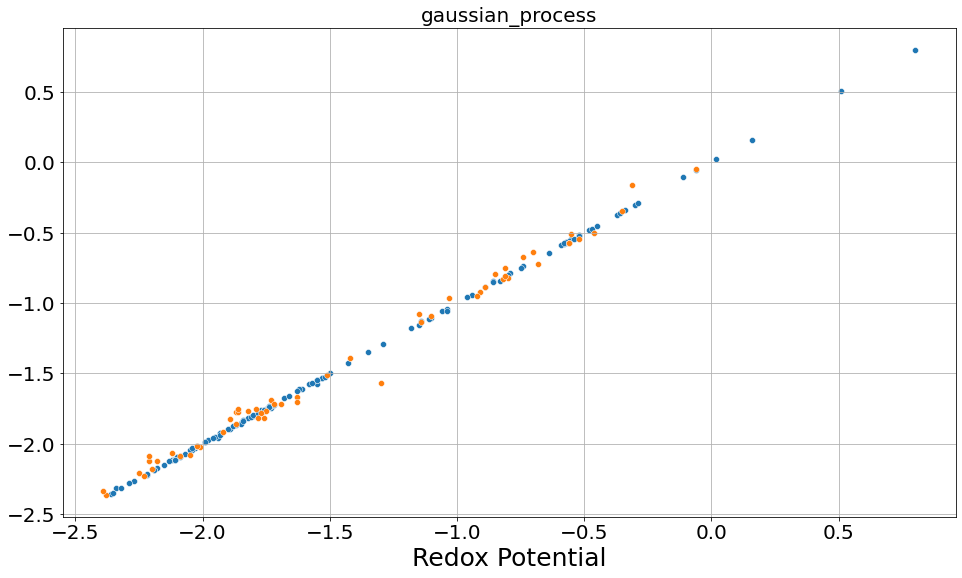

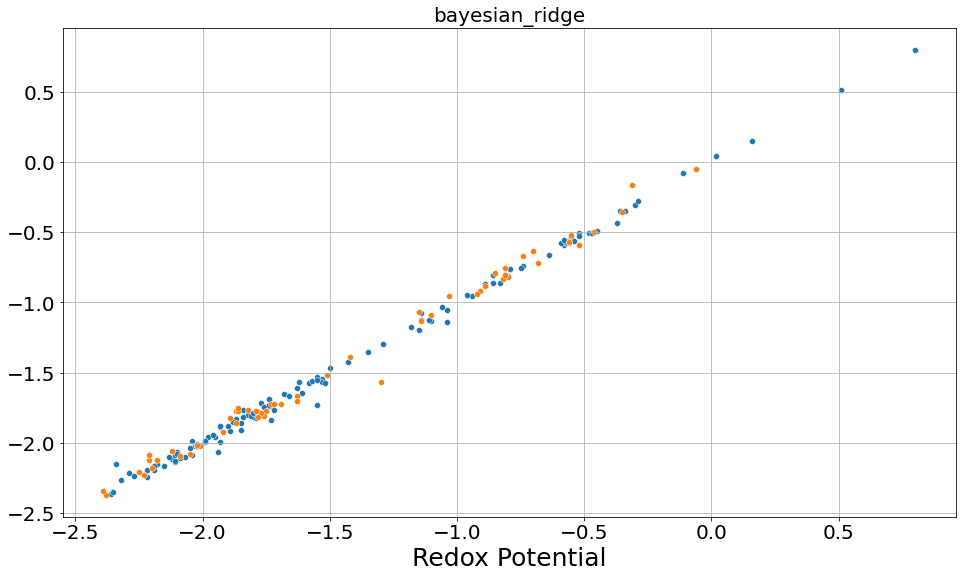

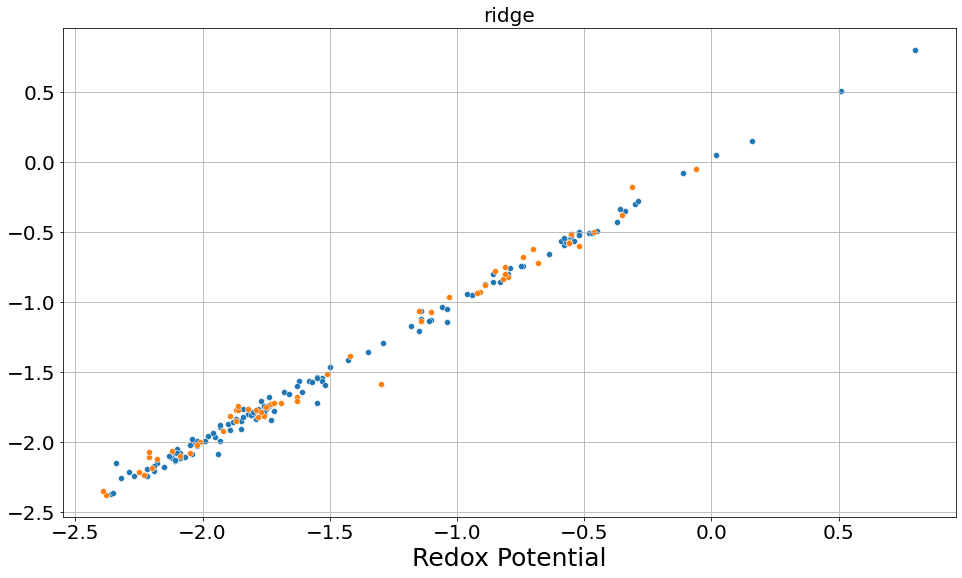

In [48]:
ntop=0
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

plt.figure()
ntop=1
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

plt.figure()
ntop=2
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

In [51]:
file_name=f'MODEL_PERFORMANCE_DF_fp_deepchem_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,fp_deepchem_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(positive=True),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.1560964584350586, 0.1399967670...",0.043133,0.349871,0.460375,0.999964,0.000017,0.000698,0.065767,0.380778,0.467013,"[-0.5799999999999903, -1.8699999999999983, -1....","[-2.036346418657717, -3.5857075242793823, -0.4..."
1,fp_deepchem_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=500, solver='saga')","{'alpha': 1.5, 'max_iter': 500, 'solver': 'sag...","{'fit_time': [1.4262657165527344, 1.7727885246...",0.922605,0.029951,0.130098,0.998060,0.000936,0.019577,0.891249,0.044325,0.138721,"[-0.6003406606707866, -1.8635363987572884, -1....","[-1.5971085577678594, -2.122751615823474, -0.6..."
2,fp_deepchem_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...",Lasso(alpha=0.01),"{'alpha': 0.01, 'max_iter': 1000, 'positive': ...","{'fit_time': [0.19003605842590332, 0.125090837...",0.902385,0.037733,0.140711,0.957153,0.020686,0.098181,0.940237,0.024359,0.114654,"[-0.7805007076667232, -1.8103304744499102, -1....","[-1.5219769403660122, -2.0950053149326546, -0...."
3,fp_deepchem_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.0456240177154541, 0.0360765457...",0.658181,0.145991,0.280193,0.726354,0.132113,0.265563,0.760053,0.097799,0.246114,"[-0.8752898455013236, -1.7171702370111148, -1....","[-1.3800871656424891, -1.769690335930493, -1.0..."
4,fp_deepchem_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.04991507530212402, 0.049538850...",0.833789,0.069769,0.182538,0.883747,0.056125,0.160633,0.895510,0.042589,0.156662,"[-0.8484098439516268, -1.7587977675083983, -1....","[-1.5446790069026999, -1.9070338738669417, -0...."
5,fp_deepchem_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.06953144073486328, 0.062884330...",0.221028,0.295245,0.367401,0.999964,0.000017,0.000698,0.751560,0.101260,0.239061,"[-0.5800000000000012, -1.869999999999999, -1.2...","[-1.875900057441397, -2.386393302019285, -1.01..."
6,fp_deepchem_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-05, alpha_2=1e-07, la...","{'alpha_1': 1e-05, 'alpha_2': 1e-07, 'lambda_1...","{'fit_time': [0.32297515869140625, 0.351147890...",0.924381,0.029983,0.127333,0.987544,0.006014,0.052531,0.919258,0.032909,0.121675,"[-0.6776550458113543, -1.8488447001759272, -1....","[-1.5762542508949808, -2.1228653563254323, -0...."
7,fp_deepchem_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(alpha_1=1e-05, lambda_1=1e-07, n...","{'alpha_1': 1e-05, 'lambda_1': 1e-07, 'n_iter'...","{'fit_time': [3.296898126602173, 1.69472360610...",0.878694,0.045273,0.154610,0.999932,0.000033,0.003576,0.871358,0.052432,0.151097,"[-0.5793535138721553, -1.8735088103037238, -1....","[-1.8065700365848907, -2.261816273936606, -0.6..."
8,fp_deepchem_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(C=0.5, tol=1e-05)","{'C': 0.5, 'max_iter': 1000, 'tol': 1e-05}","{'fit_time': [0.09489798545837402, 0.078290939...",0.827407,0.056156,0.168514,0.988966,0.005327,0.065028,0.865422,0.054852,0.171828,"[-0.6913923372039344, -1.9552237287319116, -1....","[-1.5693466877893156, -1.9029616139955563, -0...."
9,fp_deepchem_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...","HuberRegressor(epsilon=1.5, max_iter=50000)","{'alpha': 0.0001, 'epsilon': 1.5, 'max_iter': ...","

Text(0.5, 1.0, 'gradient_boosting_reg')

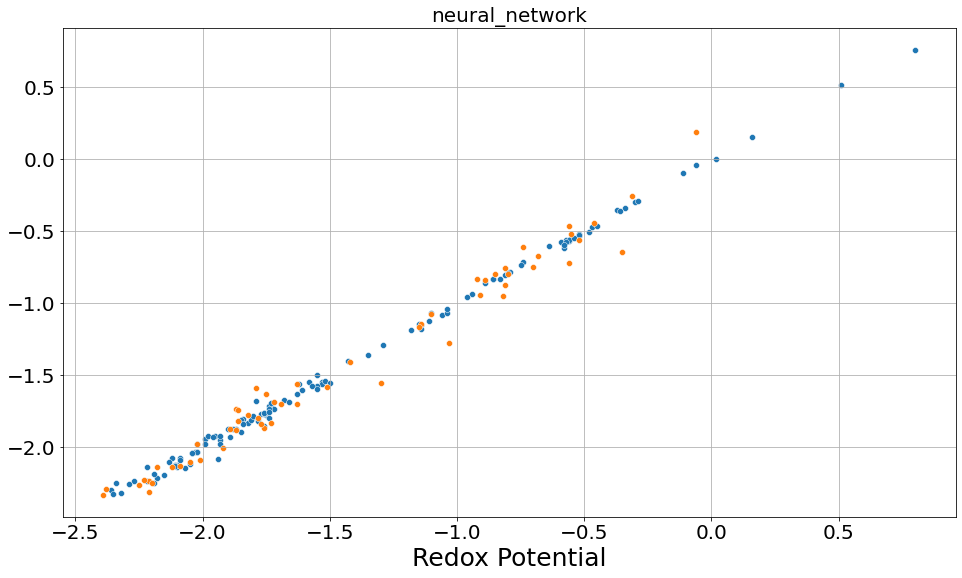

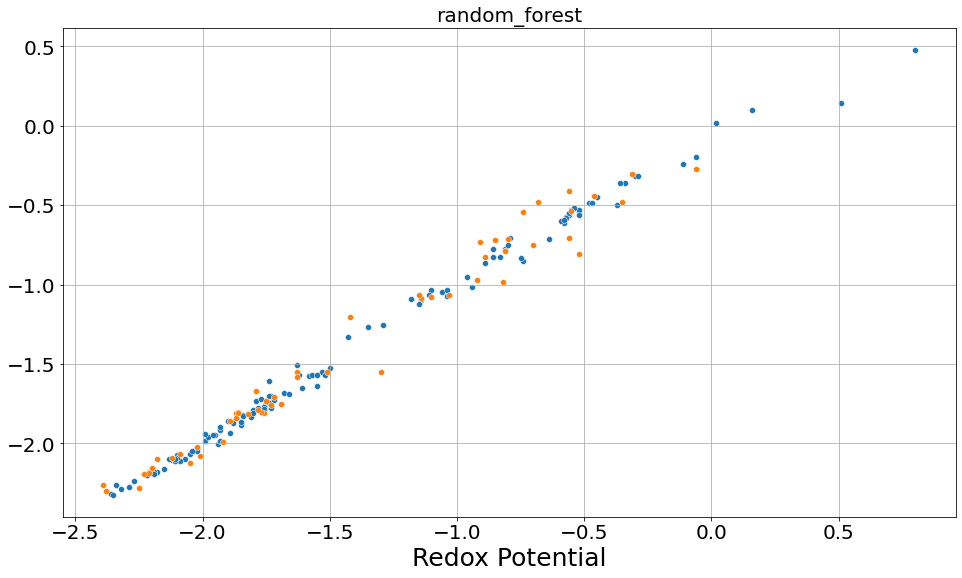

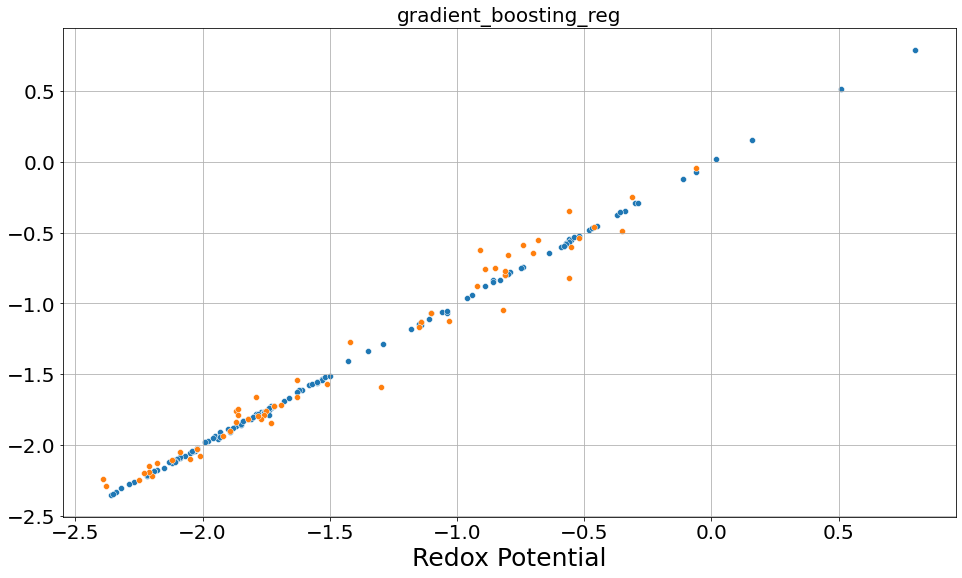

In [52]:
ntop=0
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

plt.figure()
ntop=1
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

plt.figure()
ntop=2
df=df.sort_values(by='test_mse')
best_model_row=df.sort_values(by='test_mse').iloc[ntop,:]
best_model_name=best_model_row['model_name']
sns.scatterplot(x=y_train,y=best_model_row['pred_train'])
sns.scatterplot(x=y_test,y=best_model_row['pred_test'])
plt.title(best_model_name)

# Optimized Models Vs. Error (Stacked Histogram wrt Feature Type)

In [54]:
# MODEL_OPT_DF_2d+3d+fp_rdkit.pkl
file_name=f'MODEL_PERFORMANCE_DF_2d+3d+fp_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
file_name=f'MODEL_PERFORMANCE_DF_2d_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
file_name=f'MODEL_PERFORMANCE_DF_3d_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
file_name=f'MODEL_PERFORMANCE_DF_fp_deepchem_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df

File Found
File Found
File Found
File Found


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,2d+3d+fp_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.14142060279846191, 0.154308319...",0.968083,0.009708,0.062823,1.000000,2.334106e-30,1.113047e-15,0.989772,0.004169,0.042151,"[-0.5799999999999937, -1.8699999999999997, -1....","[-1.6010139961165957, -2.248286582838187, -0.6..."
1,2d+3d+fp_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=5000, solver='saga')","{'alpha': 1.5, 'max_iter': 5000, 'solver': 'sa...","{'fit_time': [3.8680825233459473, 3.5826566219...",0.973266,0.007766,0.055787,0.998680,6.374300e-04,1.613212e-02,0.991286,0.003552,0.039159,"[-0.5986321537764605, -1.845142478443837, -1.3...","[-1.6037680800963638, -2.240615718104971, -0.6..."
2,2d+3d+fp_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=200, positive=True)","{'alpha': 0.01, 'max_iter': 200, 'positive': T...","{'fit_time': [0.13209843635559082, 0.237755060...",0.980708,0.005787,0.055394,0.992954,3.401937e-03,4.297650e-02,0.990779,0.003758,0.047393,"[-0.6030660767482522, -1.844123584335192, -1.3...","[-1.5144248061492083, -2.17215109435767, -0.69..."
3,2d+3d+fp_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.22015810012817383, 0.180590391...",0.911817,0.031395,0.144293,0.951309,2.350735e-02,1.276061e-01,0.935005,0.026491,0.138904,"[-0.7430103027373084, -1.7675425164299052, -1....","[-1.5167128827464031, -1.9187279708487472, -0...."
4,2d+3d+fp_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.0632321834564209, 0.0524141788...",0.933680,0.024419,0.127584,0.952211,2.307195e-02,1.238846e-01,0.940524,0.024242,0.129771,"[-0.7063253205775352, -1.7647783163780975, -1....","[-1.5903850212523705, -1.94458819686808, -0.84..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,fp_deepchem_rdkit,random_forest,"GridSearchCV(cv=10, estimator=RandomForestRegr...","(DecisionTreeRegressor(max_features='auto', ra...","{'bootstrap': True, 'n_estimators': 250, 'oob_...","{'fit_time': [3.2917425632476807, 4.2575562000...",0.936607,0.028246,0.110287,0.992191,3.770014e-03,3.631749e-02,0.974762,0.010287,0.075883,"[-0.6127800000000007, -1.8409200000000019, -1....","[-1.54806, -2.277760000000002, -0.750320000000..."
16,fp_deepchem_rdkit,ada_boost,"GridSearchCV(cv=10, estimator=AdaBoostRegresso...","(DecisionTreeRegressor(max_depth=3, random_sta...","{'learning_rate': 1, 'loss': 'exponential', 'n...","{'fit_time': [1.9764771461486816, 1.5781116485...",0.929078,0.030548,0.121738,0.982893,8.259195e-03,7.400334e-02,0.962872,0.015133,0.099110,"[-0.6805263157894739, -1.7293548387096775, -1....","[-1.5983333333333334, -2.1785714285714284, -0...."
17,fp_deepchem_rdkit,gradient_boosting_reg,"GridSearchCV(cv=10, estimator=GradientBoosting...",([DecisionTreeRegressor(criterion='friedman_ms...,"{'max_depth': 3, 'n_estimators': 200, 'tol': 0...","{'fit_time': [1.532433271408081, 1.55940771102...",0.966271,0.012956,0.080338,0.999786,1.031219e-04,7.890676e-03,0.973599,0.010761,0.074273,"[-0.5927058392062533, -1.8638112490963654, -1....","[-1.5877546595209862, -2.2496608758294494, -0...."
18,fp_deepchem_rdkit,neural_network,"GridSearchCV(cv=10,\n estimator=ML...","MLPRegressor(activation='logistic', early_stop...","{'activation': 'logistic', 'early_stopping': T...","{'fit_time': [7.454291105270386, 9.16046977043...",0.960664,0.016595,0.087952,0.997667,1.126306e-03,2.376423e-02,0.975633,0.009932,0.073052,"[-0.6182664027871732, -1.

(0.0, 1.0)

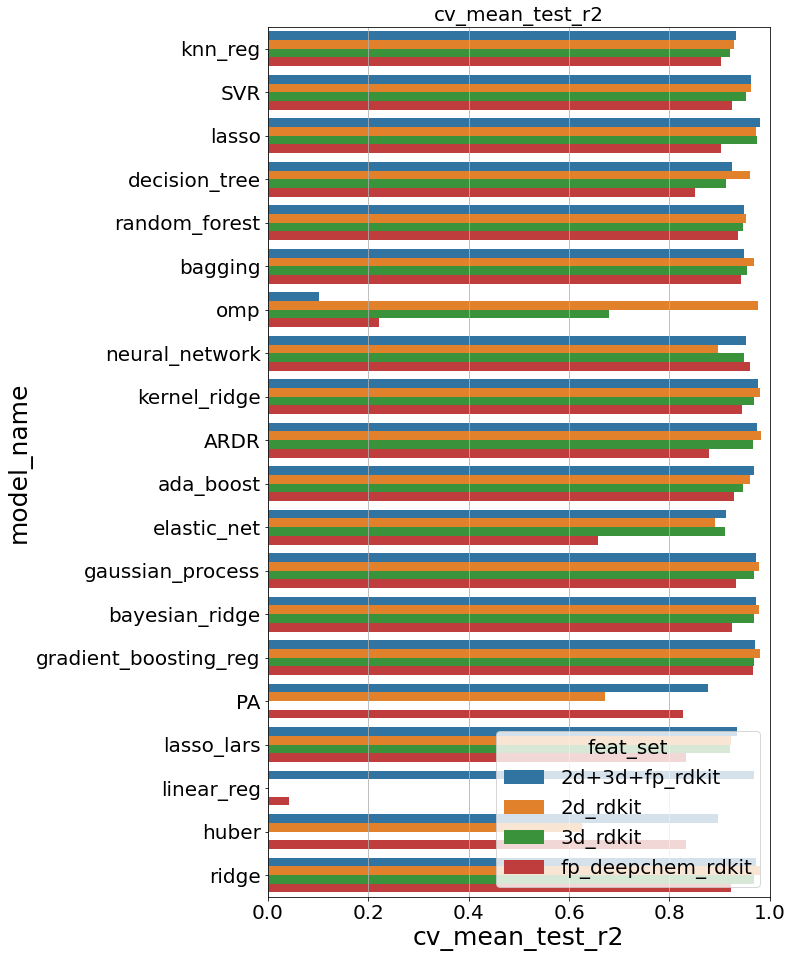

In [18]:
# plt.barh(df['model_name'],df['test_mse'])
error='cv_mean_test_r2'
df=df.sort_values(by='feat_set')
plt.figure(figsize=(9,16))
sns.barplot(x=error, y='model_name',  data=df, hue='feat_set')
plt.title(error)
plt.xlim(0,1)

(0.0, 0.4)

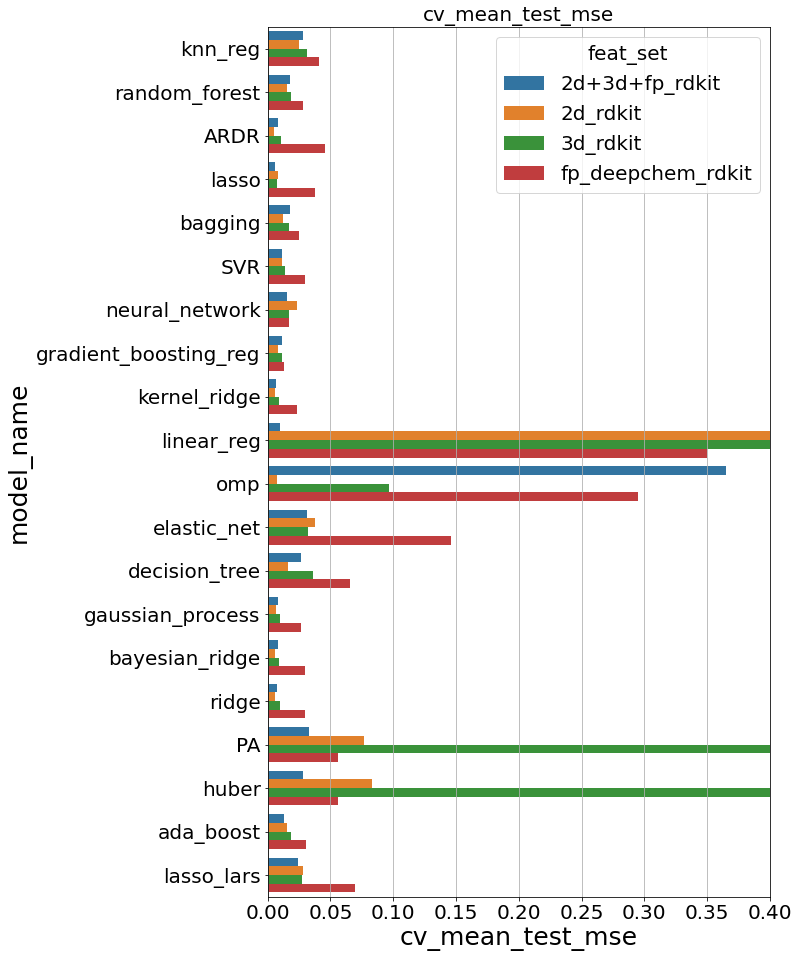

In [22]:
# plt.barh(df['model_name'],df['test_mse'])
error='cv_mean_test_mse'
df=df.sort_values(by='feat_set')
plt.figure(figsize=(9,16))
sns.barplot(x=error, y='model_name',  data=df, hue='feat_set')
plt.title(error)
plt.xlim(0,0.4)

(0.0, 1.0)

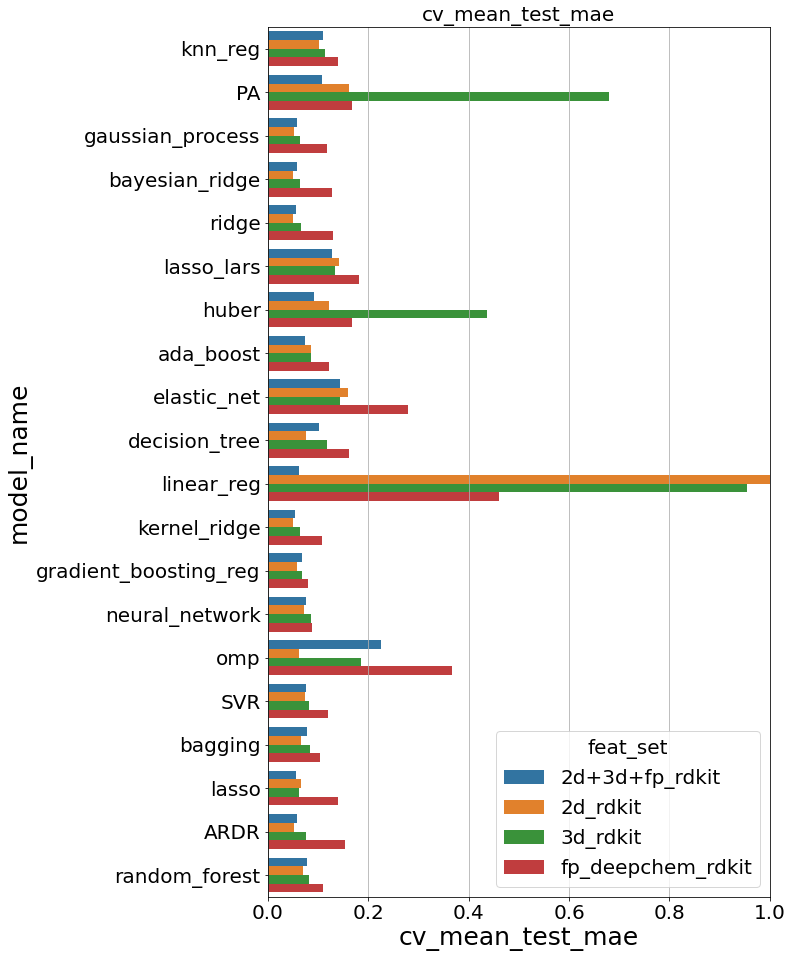

In [21]:
# plt.barh(df['model_name'],df['test_mse'])
error='cv_mean_test_mae'
df=df.sort_values(by='feat_set')
plt.figure(figsize=(9,16))
sns.barplot(x=error, y='model_name',  data=df, hue='feat_set')
plt.title(error)
plt.xlim(0,1)

(0.0, 1.1)

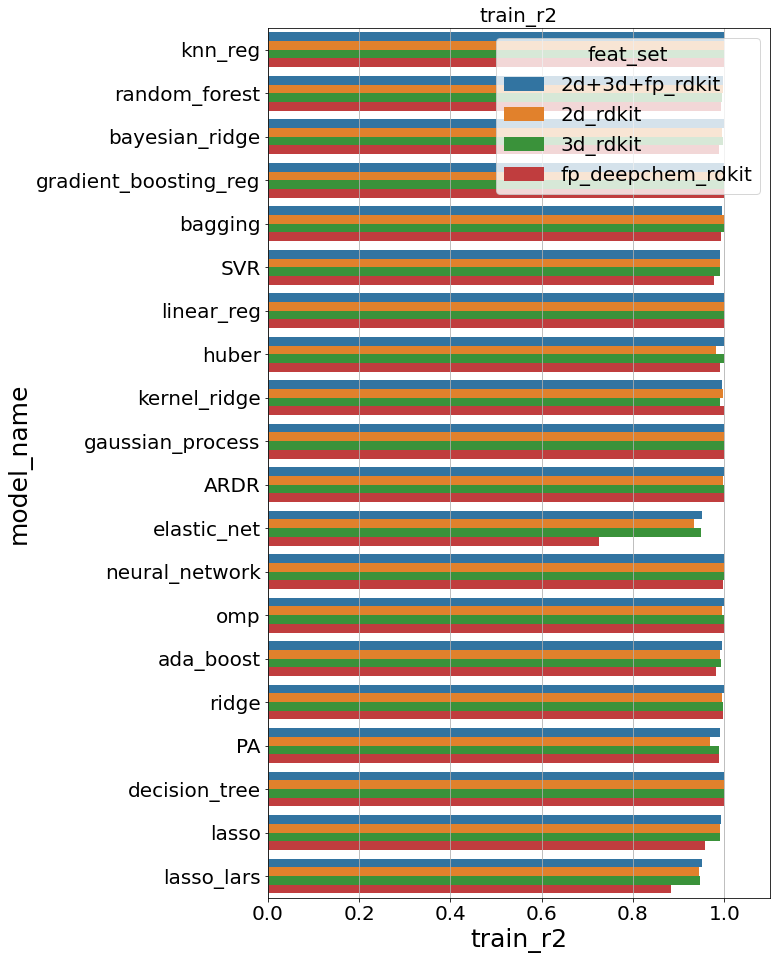

In [28]:
# plt.barh(df['model_name'],df['test_mse'])
error='train_r2'
df=df.sort_values(by='feat_set')
plt.figure(figsize=(9,16))
sns.barplot(x=error, y='model_name',  data=df, hue='feat_set')
plt.title(error)
plt.xlim(0,1.1)

(0.0, 0.4)

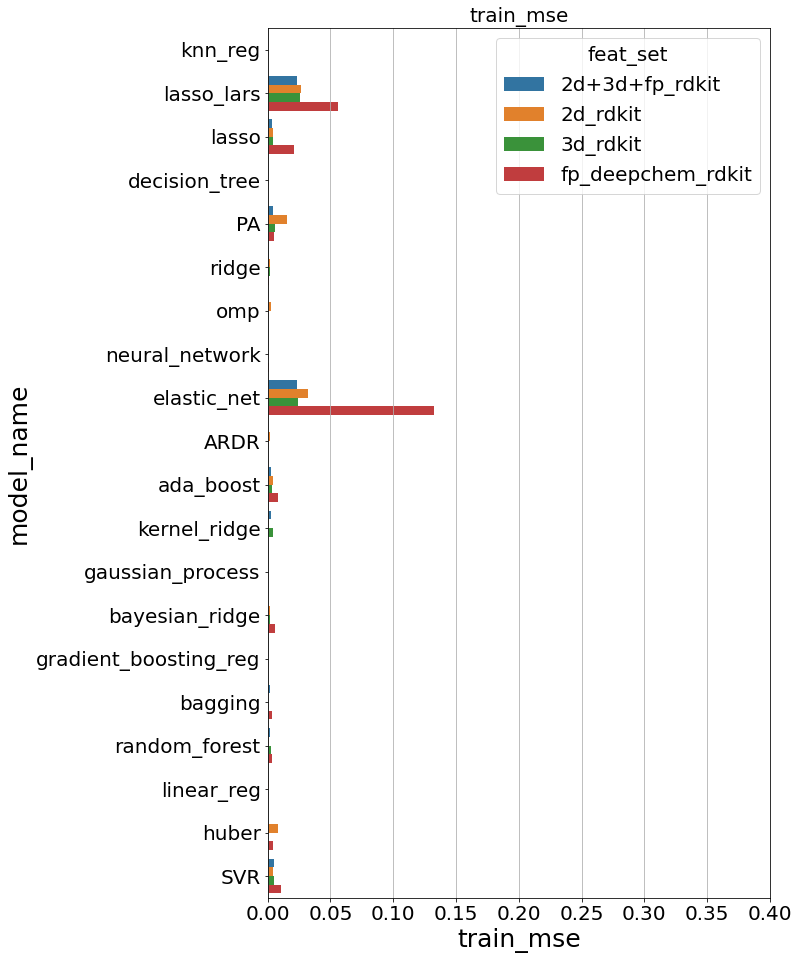

In [29]:
# plt.barh(df['model_name'],df['test_mse'])
error='train_mse'
df=df.sort_values(by='feat_set')
plt.figure(figsize=(9,16))
sns.barplot(x=error, y='model_name',  data=df, hue='feat_set')
plt.title(error)
plt.xlim(0,0.4)

(0.0, 0.4)

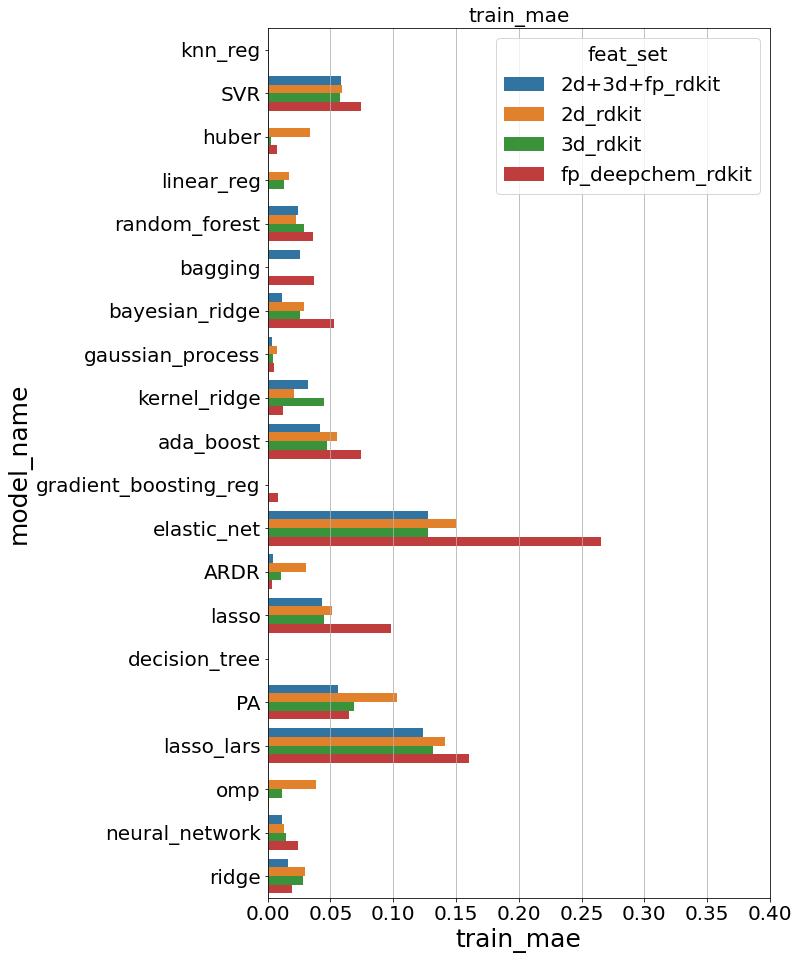

In [30]:
# plt.barh(df['model_name'],df['test_mse'])
error='train_mae'
df=df.sort_values(by='feat_set')
plt.figure(figsize=(9,16))
sns.barplot(x=error, y='model_name',  data=df, hue='feat_set')
plt.title(error)
plt.xlim(0,0.4)

(0.0, 1.0)

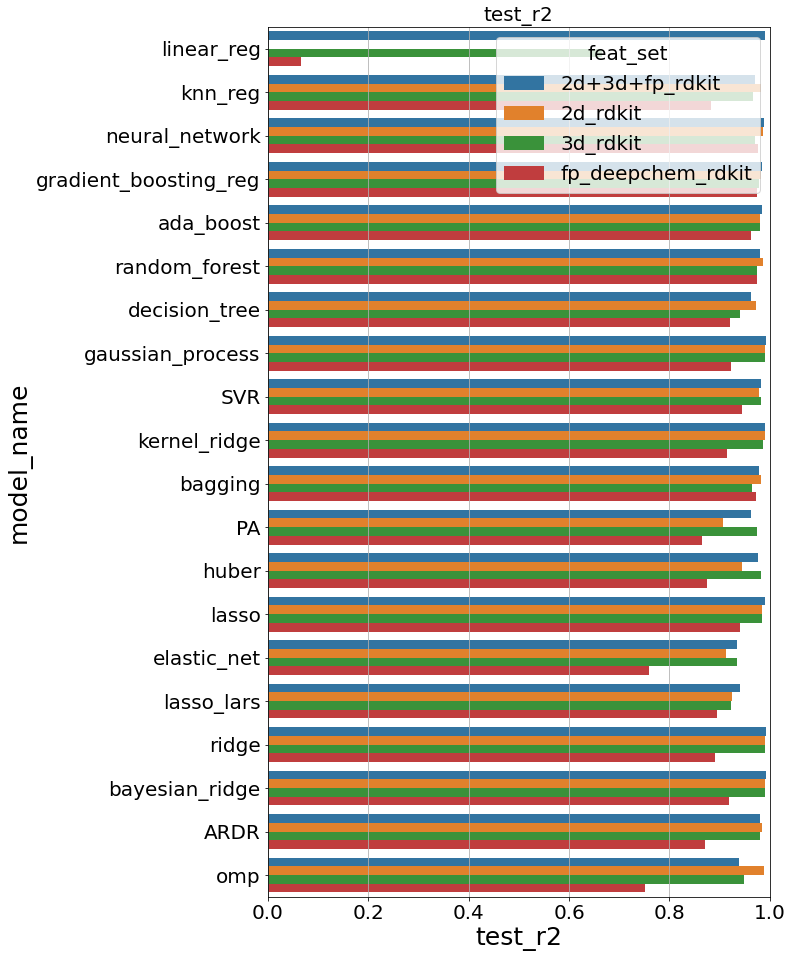

In [55]:
# plt.barh(df['model_name'],df['test_mse'])
error='test_r2'
df=df.sort_values(by='feat_set')
plt.figure(figsize=(9,16))
sns.barplot(x=error, y='model_name',  data=df, hue='feat_set')
plt.title(error)
plt.xlim(0,1)

(0.0, 0.4)

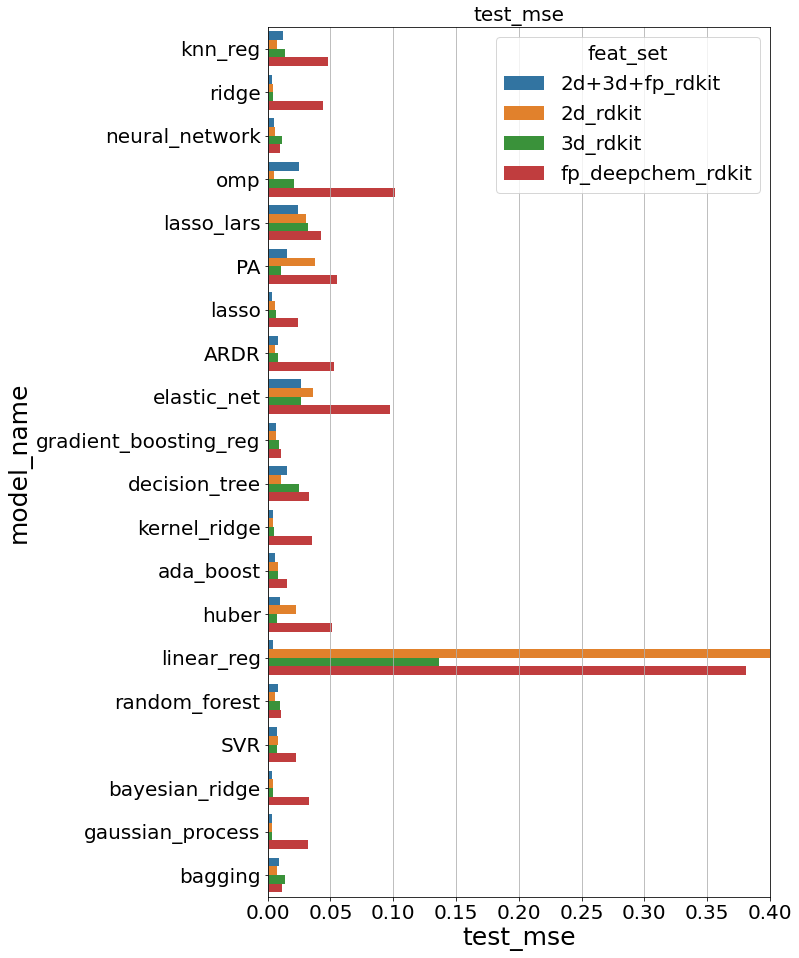

In [31]:
# plt.barh(df['model_name'],df['test_mse'])
error='test_mse'
df=df.sort_values(by='feat_set')
plt.figure(figsize=(9,16))
sns.barplot(x=error, y='model_name',  data=df, hue='feat_set')
plt.title(error)
plt.xlim(0,0.4)

(0.0, 0.4)

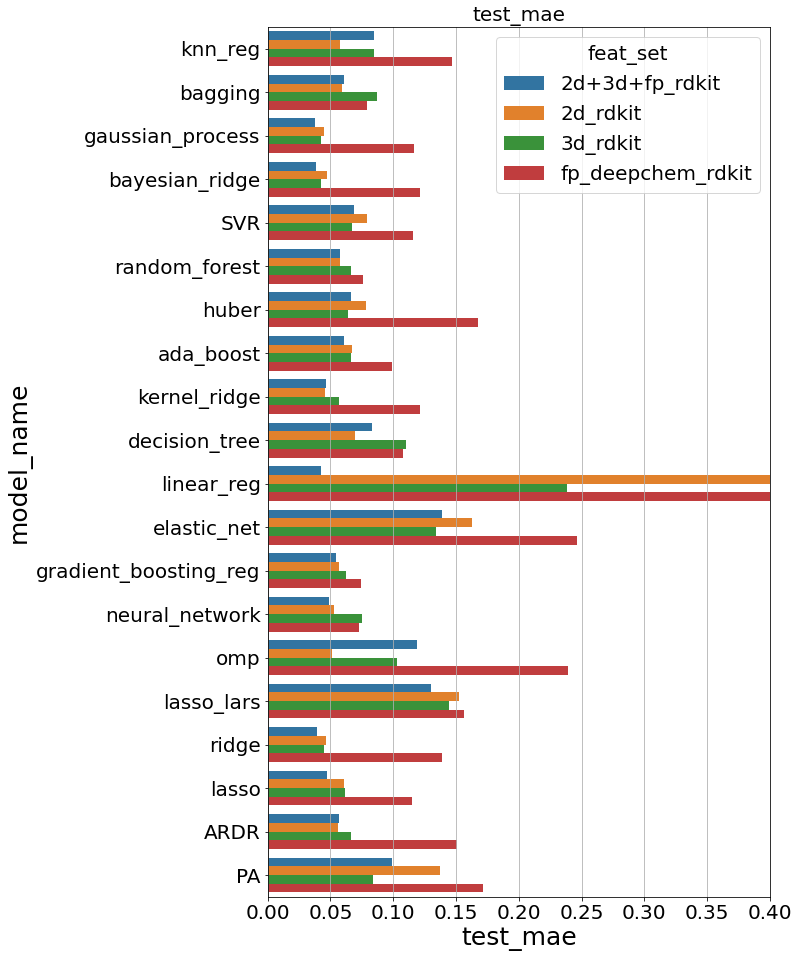

In [32]:
# plt.barh(df['model_name'],df['test_mse'])
error='test_mae'
df=df.sort_values(by='feat_set')
plt.figure(figsize=(9,16))
sns.barplot(x=error, y='model_name',  data=df, hue='feat_set')
plt.title(error)
plt.xlim(0,0.4)

# Feature Importance Plots

In [63]:
# FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl
feat_type='2d+3d+fp'
file_name=f'FETURE_IMPORTANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,feat_name,random_forest_score,ada_boost_score,gradient_boosting_reg_score,kbest_selector_score
0,FG_no_2d_basic,6.409566e-06,0.0,0.000000e+00,0.917887
1,FG_position_1_2d_basic,2.288213e-07,0.0,0.000000e+00,0.048221
2,FG_position_2_2d_basic,8.658579e-07,0.0,0.000000e+00,0.067075
3,FG_position_3_2d_basic,1.812802e-05,0.0,7.799600e-08,0.152361
4,FG_position_4_2d_basic,1.212451e-05,0.0,5.301810e-06,0.119962
...,...,...,...,...,...
3505,rdkit_fp_2042,6.375941e-06,0.0,0.000000e+00,0.217269
3506,rdkit_fp_2043,0.000000e+00,0.0,1.281112e-12,0.011116
3507,rdkit_fp_2044,0.000000e+00,0.0,0.000000e+00,0.270167
3508,rdkit_fp_2046,0.000000e+00,0.0,0.000000e+00,0.374813


<AxesSubplot:xlabel='random_forest_score', ylabel='feat_name'>

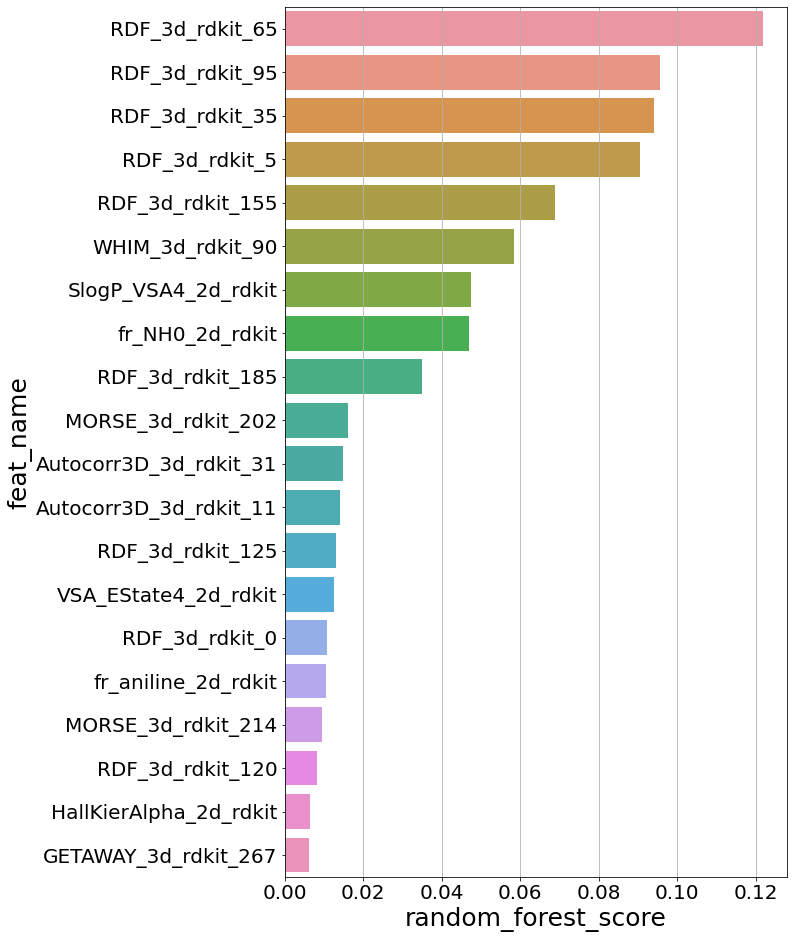

In [64]:
ntop=20
df=df.sort_values(by='random_forest_score',ascending=False)
plt.figure(figsize=(9,16))
sns.barplot(x='random_forest_score',y='feat_name',data=df[:ntop])

In [65]:
# FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl
feat_type='2d'
file_name=f'FETURE_IMPORTANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,feat_name,random_forest_score,ada_boost_score,gradient_boosting_reg_score,kbest_selector_score
0,FG_no_2d_basic,2.654419e-04,0.000000e+00,5.186524e-09,0.918359
1,FG_position_1_2d_basic,6.308153e-06,2.865012e-07,5.845278e-05,0.061677
2,FG_position_2_2d_basic,1.659108e-04,1.164046e-04,8.648397e-05,0.085283
3,FG_position_3_2d_basic,5.328982e-04,2.159098e-03,1.525832e-03,0.154114
4,FG_position_4_2d_basic,1.231583e-04,1.302637e-04,7.973214e-05,0.118591
...,...,...,...,...,...
146,fr_para_hydroxylation_2d_rdkit,1.924922e-05,2.163381e-04,2.216337e-04,0.425648
147,fr_phenol_2d_rdkit,1.086542e-06,0.000000e+00,5.307690e-06,0.185685
148,fr_phenol_noOrthoHbond_2d_rdkit,2.429437e-06,0.000000e+00,1.604067e-08,0.190207
149,fr_priamide_2d_rdkit,4.393631e-08,0.000000e+00,0.000000e+00,0.000000


<AxesSubplot:xlabel='random_forest_score', ylabel='feat_name'>

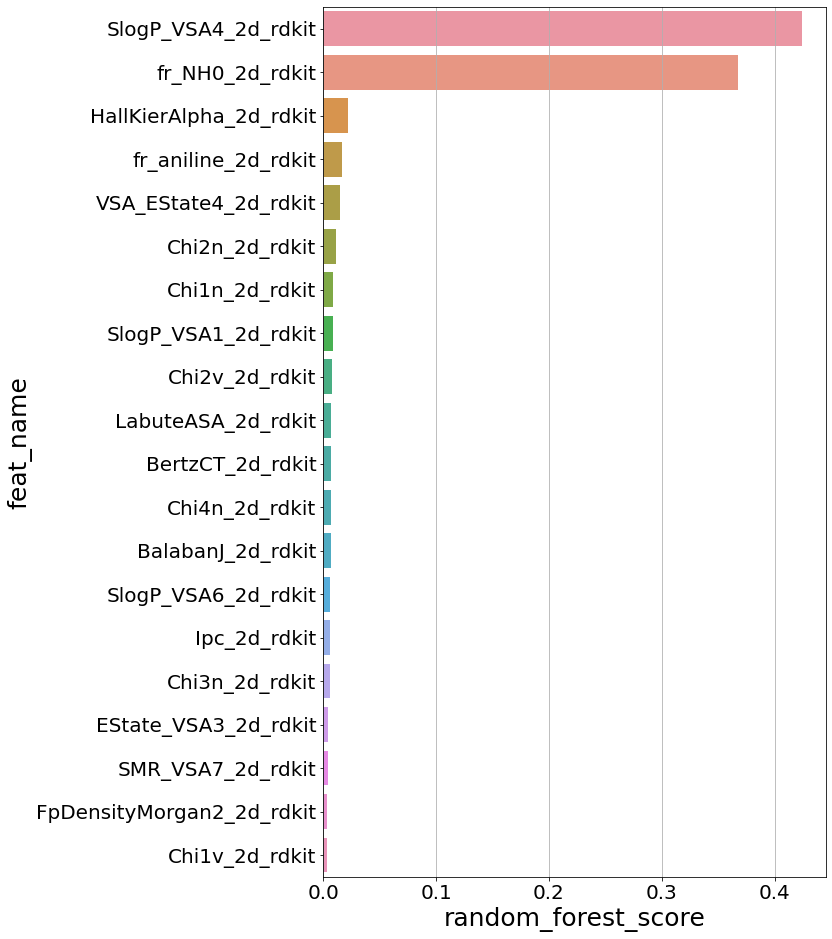

In [66]:
ntop=20
df=df.sort_values(by='random_forest_score',ascending=False)
plt.figure(figsize=(9,16))
sns.barplot(x='random_forest_score',y='feat_name',data=df[:ntop])

In [67]:
# FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl
feat_type='3d'
file_name=f'FETURE_IMPORTANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,feat_name,random_forest_score,ada_boost_score,gradient_boosting_reg_score,kbest_selector_score
0,Asphericity_3d_rdkit,0.000008,0.000000,5.827712e-09,0.086360
1,Eccentricity_3d_rdkit,0.000003,0.000000,0.000000e+00,0.095453
2,InertialShapeFactor_3d_rdkit,0.000005,0.000000,1.580592e-12,0.439807
3,NPR1_3d_rdkit,0.000002,0.000000,9.526764e-12,0.095346
4,NPR2_3d_rdkit,0.000006,0.000000,2.654648e-11,0.094319
...,...,...,...,...,...
864,GETAWAY_3d_rdkit_268,0.000004,0.000000,3.153343e-08,0.417217
865,GETAWAY_3d_rdkit_269,0.000007,0.000022,3.451052e-05,0.394943
866,GETAWAY_3d_rdkit_270,0.000676,0.000000,1.330072e-08,0.664159
867,GETAWAY_3d_rdkit_271,0.000145,0.000000,5.991648e-04,0.668752


<AxesSubplot:xlabel='random_forest_score', ylabel='feat_name'>

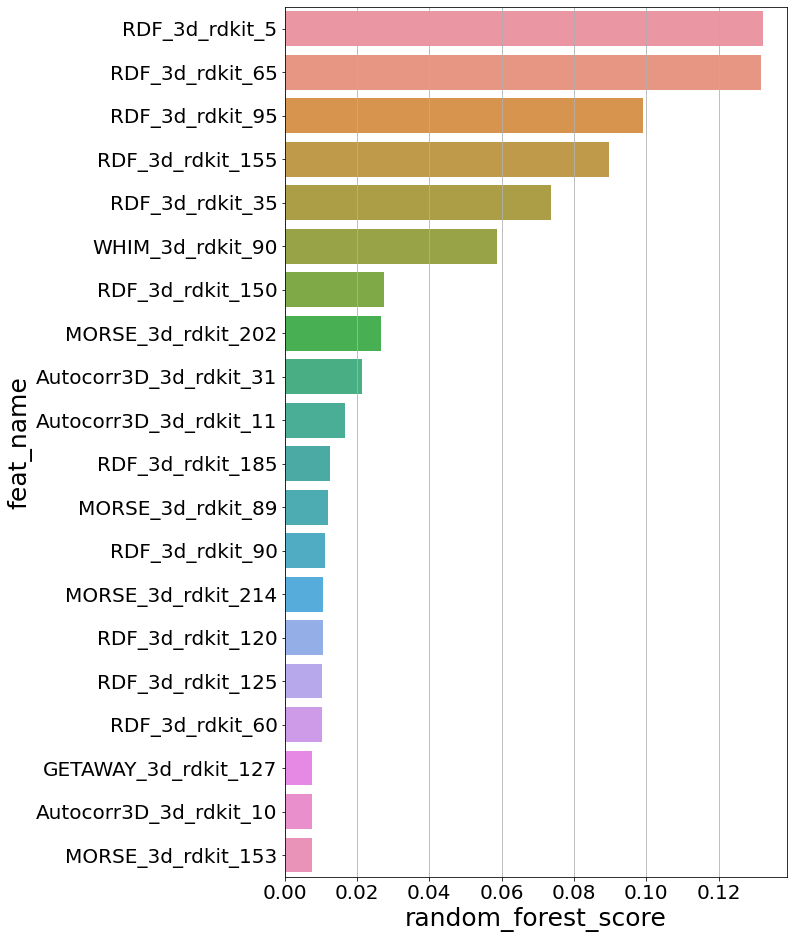

In [68]:
ntop=20
df=df.sort_values(by='random_forest_score',ascending=False)
plt.figure(figsize=(9,16))
sns.barplot(x='random_forest_score',y='feat_name',data=df[:ntop])

In [71]:
# FETURE_IMPORTANCE_DF_2d+3d+fp_{LIBRARY}.pkl
feat_type='fp_deepchem'
file_name=f'FETURE_IMPORTANCE_DF_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,feat_name,random_forest_score,ada_boost_score,gradient_boosting_reg_score,kbest_selector_score
0,ecfp4_fp_1,6.778637e-08,0.000000,0.000000e+00,0.000564
1,ecfp4_fp_2,0.000000e+00,0.000000,0.000000e+00,0.006719
2,ecfp4_fp_3,0.000000e+00,0.000000,0.000000e+00,0.005606
3,ecfp4_fp_5,2.317452e-06,0.000000,0.000000e+00,0.003046
4,ecfp4_fp_6,0.000000e+00,0.000000,0.000000e+00,0.005853
...,...,...,...,...,...
2485,rdkit_fp_2042,1.034738e-05,0.000000,3.858178e-09,0.225419
2486,rdkit_fp_2043,3.978666e-07,0.000000,0.000000e+00,0.008905
2487,rdkit_fp_2044,2.122800e-06,0.000000,0.000000e+00,0.270848
2488,rdkit_fp_2046,3.975291e-06,0.000254,0.000000e+00,0.377379


<AxesSubplot:xlabel='random_forest_score', ylabel='feat_name'>

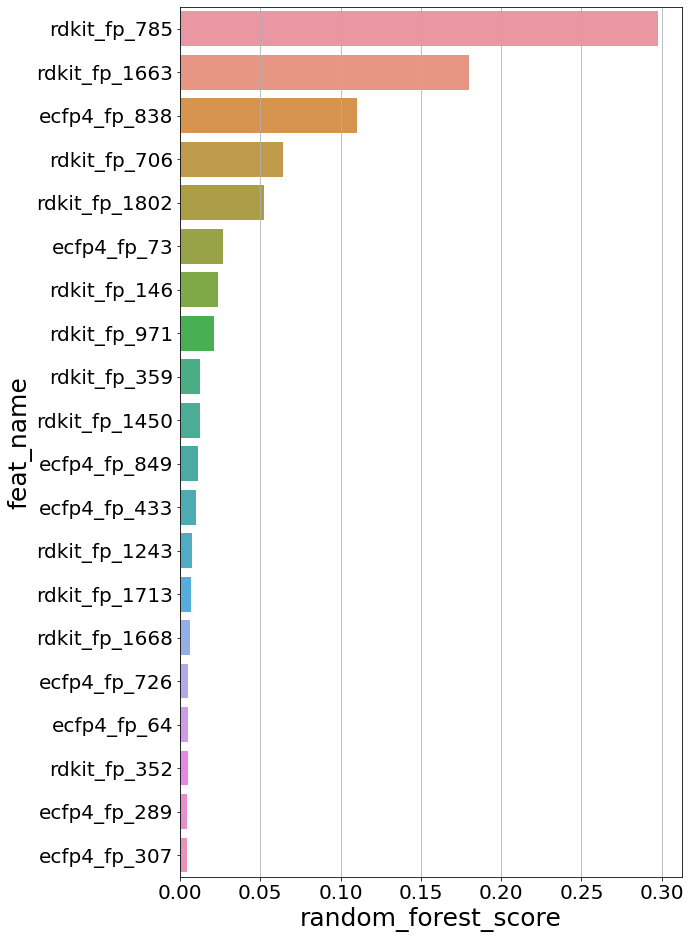

In [72]:
ntop=20
df=df.sort_values(by='random_forest_score',ascending=False)
plt.figure(figsize=(9,16))
sns.barplot(x='random_forest_score',y='feat_name',data=df[:ntop])

# Best Model Error Vs. Num Features

In [191]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='2d+3d+fp'
rank=2
file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df=df.set_index('num_feat')
df

File Found


,feat_set,model_name,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae
num_feat,,,,,,,,
1,3d_rdkit,bayesian_ridge,0.769242,0.111407,0.246690,0.714111,0.116524,0.271452
2,3d_rdkit,bayesian_ridge,0.846441,0.074137,0.221414,0.813812,0.075887,0.230862
3,3d_rdkit,bayesian_ridge,0.846240,0.074233,0.221520,0.813407,0.076052,0.230905
4,3d_rdkit,bayesian_ridge,0.874485,0.060597,0.202024,0.834424,0.067486,0.222883
5,3d_rdkit,bayesian_ridge,0.881337,0.057289,0.198861,0.833637,0.067807,0.222948
...,...,...,...,...,...,...,...,...
3505,fp+2d+3d_rdkit,bayesian_ridge,0.999283,0.000346,0.011701,0.991656,0.003401,0.038105
3506,fp+2d+3d_rdkit,bayesian_ridge,0.999283,0.000346,0.011699,0.991655,0.003401,0.038111
3507,fp+2d+3d_rdkit,bayesian_ridge,0.999283,0.000346,0.011700,0.991655,0.003401,0.038110


(0.0, 50.0)

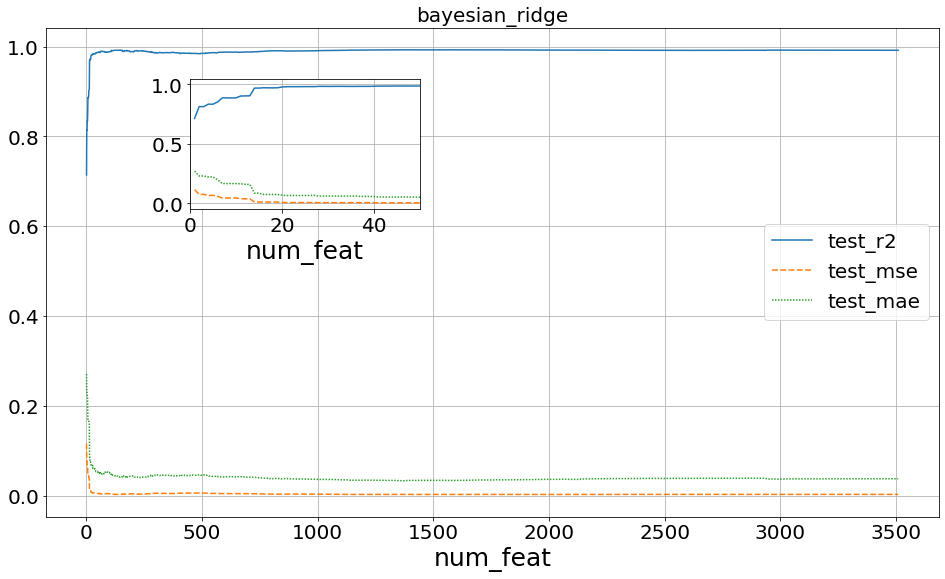

In [192]:
fig=plt.figure()
sns.lineplot(data=df[['test_r2','test_mse','test_mae']])
plt.title(df['model_name'].values[0])
# plt.xlim(0,100)

left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
_ax2=sns.lineplot(ax=ax2,data=df[['test_r2','test_mse','test_mae']])
_ax2.get_legend().remove()
ax2.set_xlim(0,50)

In [193]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='2d+3d+fp'
rank=3
file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df=df.set_index('num_feat')
df

File Found


,feat_set,model_name,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae
num_feat,,,,,,,,
1,3d_rdkit,ridge,0.769140,0.111456,0.247597,0.712561,0.117155,0.272975
2,3d_rdkit,ridge,0.832207,0.081008,0.225528,0.788777,0.086091,0.244203
3,3d_rdkit,ridge,0.837767,0.078324,0.221878,0.797100,0.082699,0.239883
4,3d_rdkit,ridge,0.837568,0.078420,0.222001,0.796668,0.082875,0.240154
5,3d_rdkit,ridge,0.840294,0.077104,0.221008,0.799366,0.081775,0.239228
...,...,...,...,...,...,...,...,...
3505,fp+2d+3d_rdkit,ridge,0.998667,0.000644,0.016201,0.991297,0.003547,0.039088
3506,fp+2d+3d_rdkit,ridge,0.998659,0.000647,0.016272,0.991289,0.003550,0.038984
3507,fp+2d+3d_rdkit,ridge,0.998684,0.000636,0.016032,0.991317,0.003539,0.038870


(0.0, 50.0)

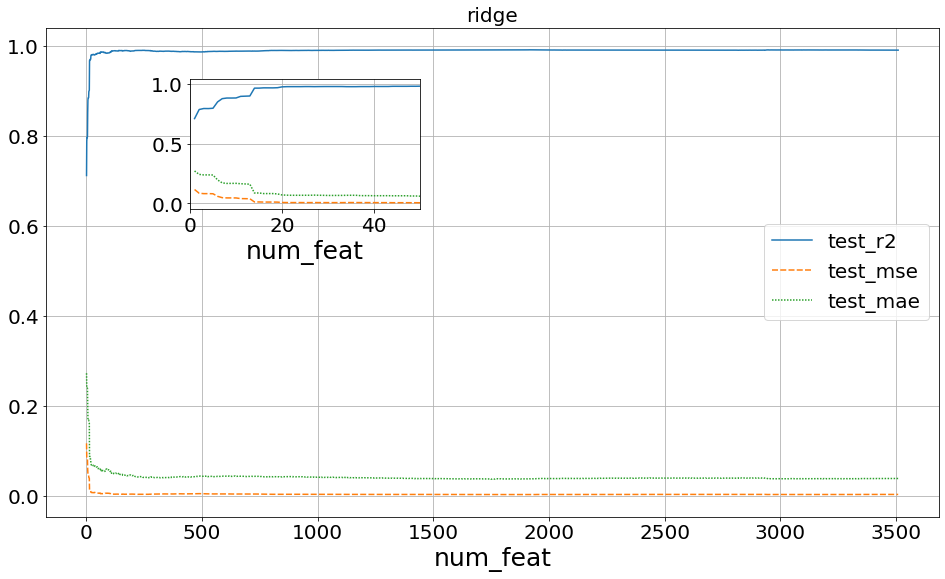

In [194]:
fig=plt.figure()
sns.lineplot(data=df[['test_r2','test_mse','test_mae']])
plt.title(df['model_name'].values[0])
# plt.xlim(0,100)

left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
_ax2=sns.lineplot(ax=ax2,data=df[['test_r2','test_mse','test_mae']])
_ax2.get_legend().remove()
ax2.set_xlim(0,50)

In [195]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='2d+3d+fp'
rank=4
file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df=df.set_index('num_feat')
df

File Found


,feat_set,model_name,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae
num_feat,,,,,,,,
1,3d_rdkit,lasso,0.769039,0.111505,0.248086,0.711760,0.117482,0.273727
2,3d_rdkit,lasso,0.823822,0.085056,0.229012,0.778469,0.090292,0.248429
3,3d_rdkit,lasso,0.823822,0.085056,0.229012,0.778469,0.090292,0.248429
4,3d_rdkit,lasso,0.823822,0.085056,0.229012,0.778469,0.090292,0.248429
5,3d_rdkit,lasso,0.823822,0.085056,0.229012,0.778469,0.090292,0.248429
...,...,...,...,...,...,...,...,...
3505,fp+2d+3d_rdkit,lasso,0.993000,0.003380,0.042038,0.991000,0.003668,0.046636
3506,fp+2d+3d_rdkit,lasso,0.993000,0.003380,0.042038,0.991000,0.003668,0.046636
3507,fp+2d+3d_rdkit,lasso,0.993000,0.003380,0.042038,0.991000,0.003668,0.046636


(0.0, 50.0)

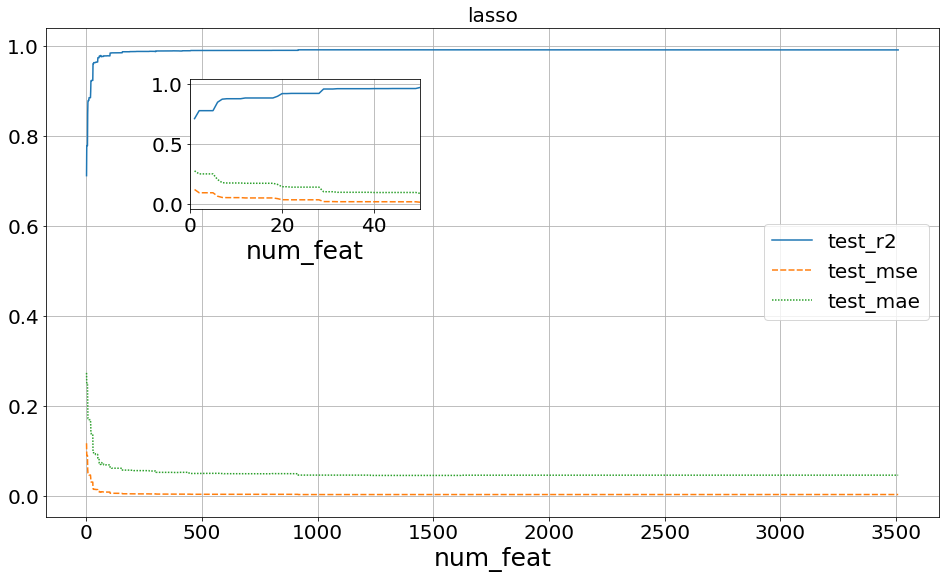

In [196]:
fig=plt.figure()
sns.lineplot(data=df[['test_r2','test_mse','test_mae']])
plt.title(df['model_name'].values[0])
# plt.xlim(0,100)

left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
_ax2=sns.lineplot(ax=ax2,data=df[['test_r2','test_mse','test_mae']])
_ax2.get_legend().remove()
ax2.set_xlim(0,50)

In [197]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='2d'
rank=2
file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df=df.set_index('num_feat')
df

File Found


,feat_set,model_name,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae
num_feat,,,,,,,,
1,2d_rdkit,ridge,0.912329,0.042326,0.166885,0.868392,0.053641,0.182408
2,2d_rdkit,ridge,0.916801,0.040167,0.162327,0.879257,0.049213,0.172673
3,2d_rdkit,ridge,0.927242,0.035127,0.150912,0.900583,0.040521,0.159545
4,2d_rdkit,ridge,0.973718,0.012688,0.088868,0.959578,0.016475,0.097570
5,2d_rdkit,ridge,0.974648,0.012240,0.085176,0.961034,0.015882,0.095859
...,...,...,...,...,...,...,...,...
146,2d_rdkit,ridge,0.995929,0.001965,0.029619,0.989914,0.004111,0.046810
147,2d_rdkit,ridge,0.995935,0.001962,0.029611,0.989877,0.004126,0.046871
148,2d_rdkit,ridge,0.995932,0.001964,0.029652,0.989876,0.004126,0.046814


(0.0, 50.0)

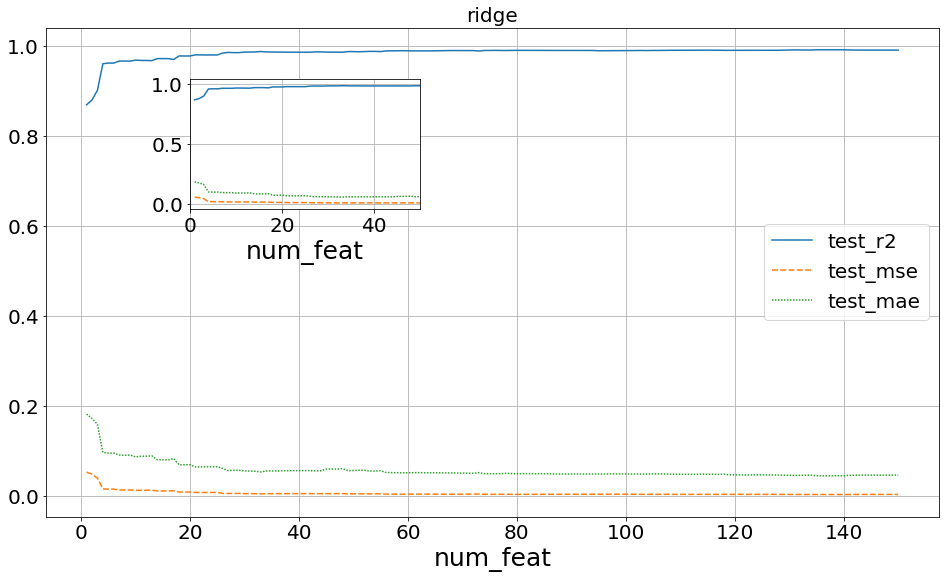

In [198]:
fig=plt.figure()
sns.lineplot(data=df[['test_r2','test_mse','test_mae']])
plt.title(df['model_name'].values[0])
# plt.xlim(0,100)

left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
_ax2=sns.lineplot(ax=ax2,data=df[['test_r2','test_mse','test_mae']])
_ax2.get_legend().remove()
ax2.set_xlim(0,50)

In [199]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='2d'
rank=3
file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df=df.set_index('num_feat')
df

File Found


,feat_set,model_name,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae
num_feat,,,,,,,,
1,2d_rdkit,kernel_ridge,0.912151,0.042412,0.166272,0.866327,0.054483,0.183156
2,2d_rdkit,kernel_ridge,0.917944,0.039616,0.161236,0.879918,0.048944,0.171517
3,2d_rdkit,kernel_ridge,0.925701,0.035871,0.153331,0.894125,0.043153,0.164061
4,2d_rdkit,kernel_ridge,0.973450,0.012818,0.089612,0.959626,0.016456,0.098347
5,2d_rdkit,kernel_ridge,0.974721,0.012204,0.085372,0.962235,0.015392,0.094720
...,...,...,...,...,...,...,...,...
146,2d_rdkit,kernel_ridge,0.997853,0.001036,0.020752,0.989833,0.004144,0.045957
147,2d_rdkit,kernel_ridge,0.997853,0.001037,0.020751,0.989829,0.004146,0.045970
148,2d_rdkit,kernel_ridge,0.997853,0.001037,0.020751,0.989809,0.004154,0.045998


(0.0, 50.0)

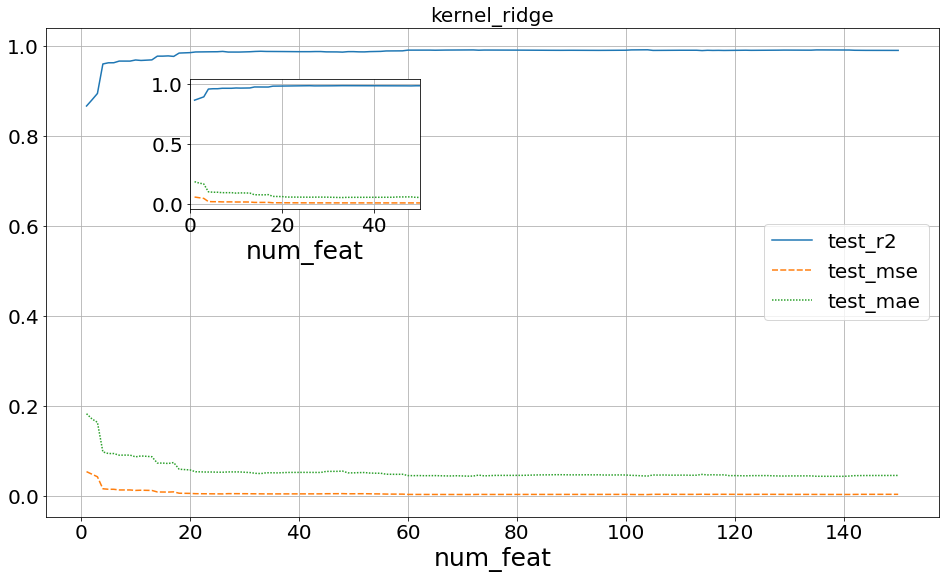

In [200]:
fig=plt.figure()
sns.lineplot(data=df[['test_r2','test_mse','test_mae']])
plt.title(df['model_name'].values[0])
# plt.xlim(0,100)

left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
_ax2=sns.lineplot(ax=ax2,data=df[['test_r2','test_mse','test_mae']])
_ax2.get_legend().remove()
ax2.set_xlim(0,50)

In [201]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='2d'
rank=4
file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df=df.set_index('num_feat')
df

File Found


,feat_set,model_name,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae
num_feat,,,,,,,,
1,2d_rdkit,bayesian_ridge,0.912355,0.042314,0.166972,0.868938,0.053419,0.182102
2,2d_rdkit,bayesian_ridge,0.916978,0.040082,0.162033,0.880766,0.048598,0.171782
3,2d_rdkit,bayesian_ridge,0.928355,0.034589,0.148770,0.907084,0.037871,0.153631
4,2d_rdkit,bayesian_ridge,0.974131,0.012489,0.087296,0.961141,0.015838,0.094695
5,2d_rdkit,bayesian_ridge,0.974794,0.012169,0.084480,0.961471,0.015704,0.094947
...,...,...,...,...,...,...,...,...
146,2d_rdkit,bayesian_ridge,0.996145,0.001861,0.028779,0.989644,0.004221,0.047060
147,2d_rdkit,bayesian_ridge,0.996145,0.001861,0.028777,0.989648,0.004219,0.047063
148,2d_rdkit,bayesian_ridge,0.996145,0.001861,0.028777,0.989643,0.004222,0.047072


(0.0, 50.0)

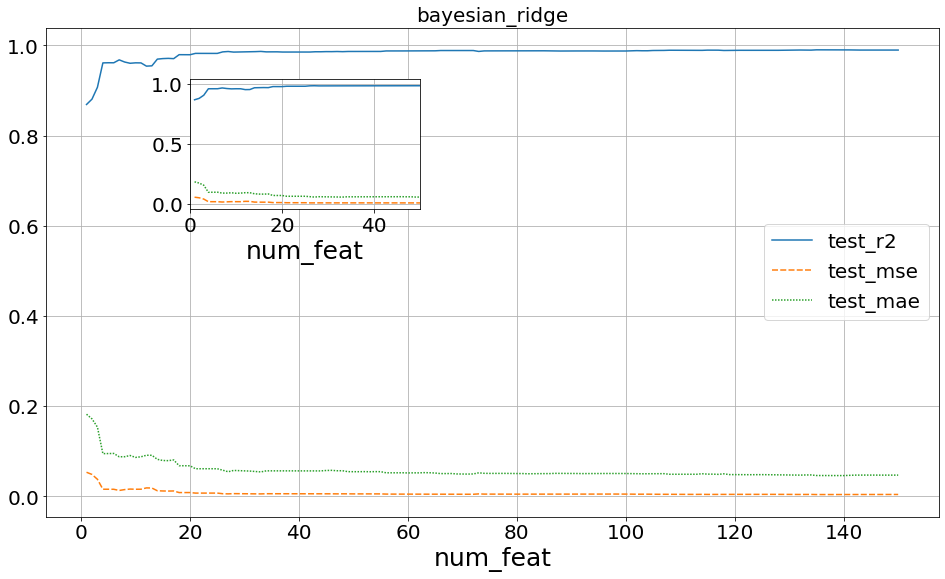

In [202]:
fig=plt.figure()
sns.lineplot(data=df[['test_r2','test_mse','test_mae']])
plt.title(df['model_name'].values[0])
# plt.xlim(0,100)

left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
_ax2=sns.lineplot(ax=ax2,data=df[['test_r2','test_mse','test_mae']])
_ax2.get_legend().remove()
ax2.set_xlim(0,50)

In [203]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='3d'
rank=2
file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df=df.set_index('num_feat')
df

File Found


,feat_set,model_name,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae
num_feat,,,,,,,,
1,3d_rdkit,bayesian_ridge,0.791753,0.100539,0.239891,0.741456,0.105378,0.261553
2,3d_rdkit,bayesian_ridge,0.829640,0.082247,0.229814,0.791812,0.084854,0.239211
3,3d_rdkit,bayesian_ridge,0.874400,0.060638,0.202467,0.834443,0.067478,0.223053
4,3d_rdkit,bayesian_ridge,0.880285,0.057797,0.200153,0.834135,0.067604,0.222802
5,3d_rdkit,bayesian_ridge,0.881337,0.057289,0.198861,0.833637,0.067807,0.222948
...,...,...,...,...,...,...,...,...
864,3d_rdkit,bayesian_ridge,0.996802,0.001544,0.025967,0.990526,0.003861,0.042792
865,3d_rdkit,bayesian_ridge,0.996798,0.001546,0.025980,0.990525,0.003862,0.042812
866,3d_rdkit,bayesian_ridge,0.996797,0.001547,0.025987,0.990523,0.003863,0.042824


(0.0, 50.0)

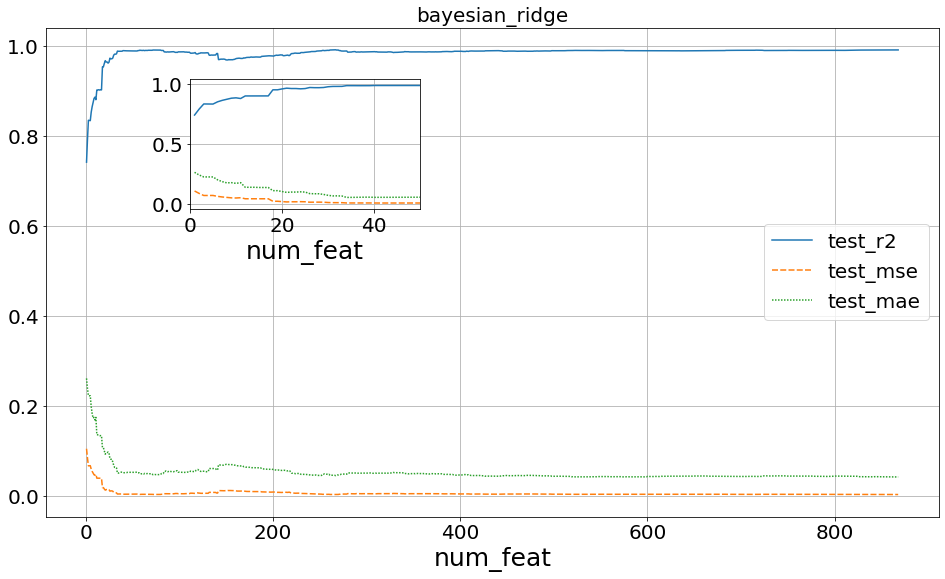

In [204]:
fig=plt.figure()
sns.lineplot(data=df[['test_r2','test_mse','test_mae']])
plt.title(df['model_name'].values[0])
# plt.xlim(0,100)

left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
_ax2=sns.lineplot(ax=ax2,data=df[['test_r2','test_mse','test_mae']])
_ax2.get_legend().remove()
ax2.set_xlim(0,50)

In [205]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='3d'
rank=3
file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df=df.set_index('num_feat')
df

File Found


,feat_set,model_name,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae
num_feat,,,,,,,,
1,3d_rdkit,ridge,0.791747,0.100542,0.240041,0.741204,0.105481,0.261803
2,3d_rdkit,ridge,0.794967,0.098987,0.239824,0.743780,0.104431,0.261683
3,3d_rdkit,ridge,0.835703,0.079321,0.223437,0.793943,0.083986,0.241647
4,3d_rdkit,ridge,0.836958,0.078715,0.223080,0.794985,0.083561,0.241410
5,3d_rdkit,ridge,0.845130,0.074769,0.219843,0.806060,0.079047,0.235760
...,...,...,...,...,...,...,...,...
864,3d_rdkit,ridge,0.996377,0.001749,0.028481,0.989635,0.004225,0.044623
865,3d_rdkit,ridge,0.996370,0.001753,0.028454,0.989632,0.004226,0.044586
866,3d_rdkit,ridge,0.996362,0.001756,0.028492,0.989636,0.004224,0.044581


(0.0, 50.0)

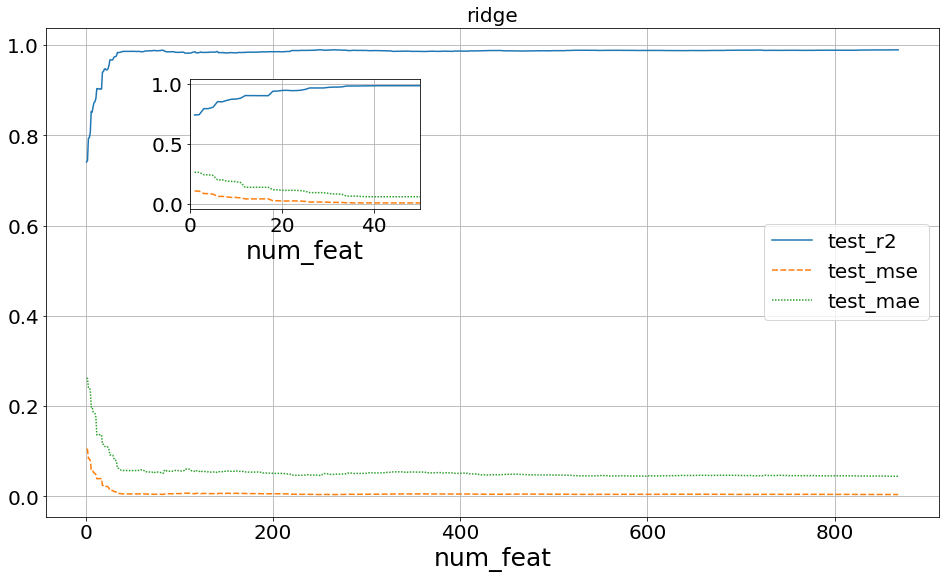

In [206]:
fig=plt.figure()
sns.lineplot(data=df[['test_r2','test_mse','test_mae']])
plt.title(df['model_name'].values[0])
# plt.xlim(0,100)

left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
_ax2=sns.lineplot(ax=ax2,data=df[['test_r2','test_mse','test_mae']])
_ax2.get_legend().remove()
ax2.set_xlim(0,50)

In [207]:
# BEST_MODEL_VS_NUM_FETUREs_2d+3d+fp_rdkit.pkl
feat_type='3d'
rank=4
file_name=f'RANK_{rank}_MODEL_VS_NUM_FETURES_{feat_type}_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df=df.set_index('num_feat')
df

File Found


,feat_set,model_name,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae
num_feat,,,,,,,,
1,3d_rdkit,kernel_ridge,0.380218,0.299223,0.468040,0.322036,0.276327,0.471260
2,3d_rdkit,kernel_ridge,0.532803,0.225557,0.400739,0.456918,0.221351,0.416330
3,3d_rdkit,kernel_ridge,0.626545,0.180299,0.356500,0.545635,0.185192,0.375973
4,3d_rdkit,kernel_ridge,0.672606,0.158062,0.328924,0.590318,0.166980,0.352219
5,3d_rdkit,kernel_ridge,0.708674,0.140648,0.308804,0.627494,0.151827,0.332702
...,...,...,...,...,...,...,...,...
864,3d_rdkit,kernel_ridge,0.990885,0.004401,0.044856,0.987146,0.005239,0.056578
865,3d_rdkit,kernel_ridge,0.990886,0.004400,0.044853,0.987141,0.005241,0.056579
866,3d_rdkit,kernel_ridge,0.990887,0.004400,0.044847,0.987138,0.005243,0.056580


(0.0, 50.0)

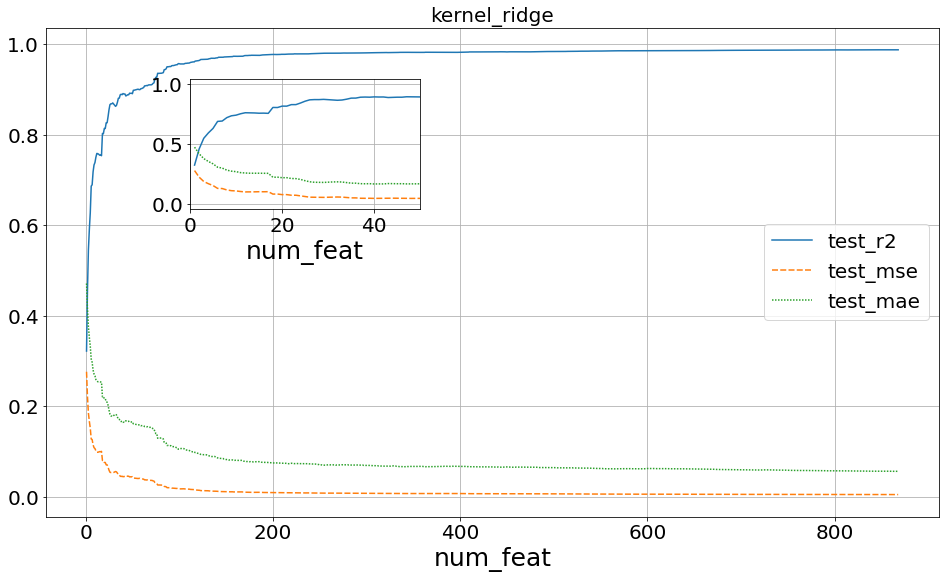

In [208]:
fig=plt.figure()
sns.lineplot(data=df[['test_r2','test_mse','test_mae']])
plt.title(df['model_name'].values[0])
# plt.xlim(0,100)

left, bottom, width, height = [0.25, 0.6, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
_ax2=sns.lineplot(ax=ax2,data=df[['test_r2','test_mse','test_mae']])
_ax2.get_legend().remove()
ax2.set_xlim(0,50)

# Model Performance on Top n=20 Features

In [93]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
feat_type='2d+3d+fp'
file_name=f'TOP_5_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
file_name=f'TOP_10_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
file_name=f'TOP_15_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
file_name=f'TOP_20_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df

File Found
File Found
File Found
File Found


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,top_5_2d+3d+fp_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(normalize=True),"{'fit_intercept': True, 'normalize': True, 'po...","{'fit_time': [0.00444793701171875, 0.006330251...",-0.213947,0.474333,0.564662,0.082393,0.443009,0.537837,0.057746,0.384047,0.522908,"[-1.3384313725490198, -1.8152631578947371, -1....","[-1.5733333333333333, -1.3384313725490198, -1...."
1,top_5_2d+3d+fp_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=500, solver='lsqr')","{'alpha': 1.5, 'max_iter': 500, 'solver': 'lsq...","{'fit_time': [0.0032978057861328125, 0.0043807...",-0.201864,0.472272,0.562645,0.074242,0.446944,0.545689,0.082921,0.373786,0.514478,"[-1.3423924615228855, -1.7974508709692993, -1....","[-1.5714397975633028, -1.3423924615228855, -1...."
2,top_5_2d+3d+fp_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'max_iter': 100, 'positive': F...","{'fit_time': [0.005055904388427734, 0.00662088...",-0.192415,0.471582,0.564479,0.057754,0.454904,0.553698,0.084254,0.373243,0.513635,"[-1.3533644859813085, -1.747382073779515, -1.3...","[-1.5732468660630723, -1.3533644859813085, -1...."
3,top_5_2d+3d+fp_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.006615638732910156, 0.00660538...",-0.265099,0.498376,0.606896,0.000000,0.482787,0.597505,-0.000073,0.407613,0.576034,"[-1.416511627906977, -1.416511627906977, -1.41...","[-1.416511627906977, -1.416511627906977, -1.41..."
4,top_5_2d+3d+fp_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.0036809444427490234, 0.0060563...",-0.222075,0.484142,0.588975,0.031526,0.467567,0.579499,0.046457,0.388649,0.551449,"[-1.3928092505148923, -1.5419790373785316, -1....","[-1.4672694949048142, -1.3928092505148923, -1...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,top_20_2d+3d+fp_rdkit,random_forest,"GridSearchCV(cv=10, estimator=RandomForestRegr...","(DecisionTreeRegressor(max_features='auto', ra...","{'bootstrap': False, 'n_estimators': 100, 'oob...","{'fit_time': [0.1564195156097412, 0.1701381206...",0.088176,0.348133,0.467749,0.420577,0.279738,0.391116,0.175865,0.335904,0.437878,"[-0.5799999999999987, -1.8168750000000022, -1....","[-1.5733333333333328, -1.323835616438357, -1.3..."
16,top_20_2d+3d+fp_rdkit,ada_boost,"GridSearchCV(cv=10, estimator=AdaBoostRegresso...","(DecisionTreeRegressor(max_depth=3, random_sta...","{'learning_rate': 1, 'loss': 'linear', 'n_esti...","{'fit_time': [0.034136295318603516, 0.02548313...",-0.140746,0.443689,0.544586,0.306021,0.335044,0.467387,0.151711,0.345749,0.474459,"[-1.3110999999999995, -1.78, -1.31109999999999...","[-1.62, -1.3110999999999995, -1.31109999999999..."
17,top_20_2d+3d+fp_rdkit,gradient_boosting_reg,"GridSearchCV(cv=10, estimator=GradientBoosting...",([DecisionTreeRegressor(criterion='friedman_ms...,"{'max_depth': 50, 'n_estimators': 50, 'tol': 0...","{'fit_time': [0.035928964614868164, 0.03131628...",0.118916,0.333935,0.459827,0.420565,0.279744,0.391145,0.177995,0.335036,0.437621,"[-0.5843111928885418, -1.8148116171789879, -1....","[-1.5725251095159374, -1.3243132477685762, -1...."
18,top_20_2d+3d+fp_rdkit,neural_network,"GridSearchCV(cv=10,\n estimator=ML...","MLPRegressor(hidden_layer_sizes=(80, 60, 30), ...","{'activation': 'relu', 'early_stopping': False...","{'fit_time': [0.21631884574890137, 0.338229894...",0.057791,0.354183,0.475453,0.403286,0.288086,0.404871,0.247834,0.306570,0.421091,"[-0.6728779359940311, -1.814927559453852, -1.3

<AxesSubplot:xlabel='test_mse', ylabel='model_name'>

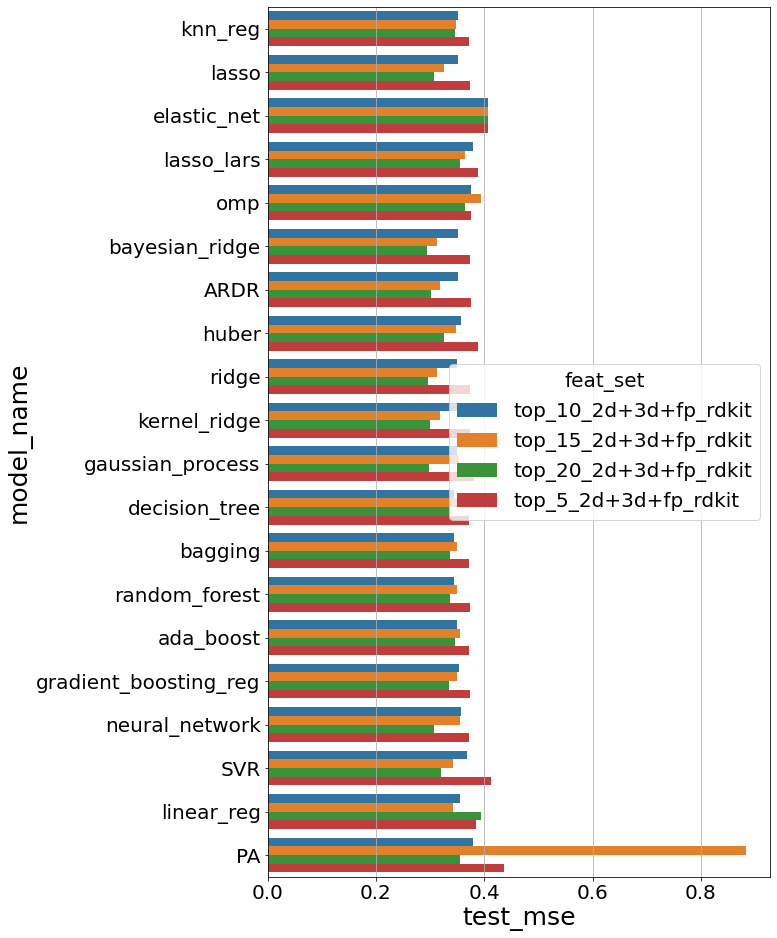

In [94]:
plt.figure(figsize=(9,16))
df=df.sort_values(by='feat_set')
sns.barplot(x='test_mse',y='model_name',data=df,hue='feat_set')

In [95]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
feat_type='2d'
file_name=f'TOP_5_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
file_name=f'TOP_10_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
file_name=f'TOP_15_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
file_name=f'TOP_20_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df

File Found
File Found
File Found
File Found


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,top_5_2d_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.003083467483520508, 0.00271296...",-0.262536,0.496105,0.601862,0.008216,0.478821,0.589061,0.003740,0.406059,0.572896,"[-1.4043878437742523, -1.4043878437742523, -1....","[-1.4093960359582274, -1.4043878437742523, -1...."
1,top_5_2d_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=500, solver='lsqr')","{'alpha': 1.5, 'max_iter': 500, 'solver': 'lsq...","{'fit_time': [0.005762815475463867, 0.00513029...",-0.262166,0.495935,0.601996,0.008550,0.478659,0.587823,0.001942,0.406792,0.574870,"[-1.402971582467072, -1.402971582467072, -1.40...","[-1.528551092724629, -1.402971582467072, -1.40..."
2,top_5_2d_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=100, tol=1e-07)","{'alpha': 0.01, 'max_iter': 100, 'positive': F...","{'fit_time': [0.0028128623962402344, 0.0030884...",-0.262201,0.496342,0.602896,0.007873,0.478986,0.589923,0.003596,0.406118,0.573353,"[-1.4065307898130397, -1.4065307898130397, -1....","[-1.4168629150101526, -1.4065307898130397, -1...."
3,top_5_2d_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.006233930587768555, 0.00286507...",-0.265099,0.498376,0.606896,0.000000,0.482787,0.597505,-0.000073,0.407613,0.576034,"[-1.416511627906977, -1.416511627906977, -1.41...","[-1.416511627906977, -1.416511627906977, -1.41..."
4,top_5_2d_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.004363059997558594, 0.00285983...",-0.265099,0.498376,0.606896,0.000000,0.482787,0.597505,-0.000073,0.407613,0.576034,"[-1.416511627906977, -1.416511627906977, -1.41...","[-1.416511627906977, -1.416511627906977, -1.41..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,top_20_2d_rdkit,random_forest,"GridSearchCV(cv=10, estimator=RandomForestRegr...","(DecisionTreeRegressor(max_features='auto', ra...","{'bootstrap': True, 'n_estimators': 50, 'oob_s...","{'fit_time': [0.10892081260681152, 0.109307527...",-0.184944,0.465424,0.543237,0.084317,0.442080,0.519834,0.111232,0.362247,0.483514,"[-1.2927797370363734, -1.7675555888555885, -1....","[-1.5185272405312353, -1.2927797370363734, -1...."
16,top_20_2d_rdkit,ada_boost,"GridSearchCV(cv=10, estimator=AdaBoostRegresso...","(DecisionTreeRegressor(max_depth=3, random_sta...","{'learning_rate': 1, 'loss': 'square', 'n_esti...","{'fit_time': [0.017207860946655273, 0.02069926...",-0.239272,0.470397,0.560696,0.061830,0.452936,0.540844,0.078409,0.375625,0.496888,"[-1.2387755102040816, -1.77, -1.23877551020408...","[-1.2670408163265305, -1.2387755102040816, -1...."
17,top_20_2d_rdkit,gradient_boosting_reg,"GridSearchCV(cv=10, estimator=GradientBoosting...",([DecisionTreeRegressor(criterion='friedman_ms...,"{'max_depth': 3, 'n_estimators': 50, 'tol': 0.01}","{'fit_time': [0.02104806900024414, 0.024778604...",-0.178412,0.463540,0.539354,0.085626,0.441448,0.517499,0.114101,0.361078,0.478433,"[-1.300949265292767, -1.7706465776753586, -1.3...","[-1.4961157398147922, -1.300949265292767, -1.3..."
18,top_20_2d_rdkit,neural_network,"GridSearchCV(cv=10,\n estimator=ML...","MLPRegressor(activation='logistic', early_stop...","{'activation': 'logistic', 'early_stopping': T...","{'fit_time': [0.1446232795715332, 0.1884963512...",-0.182935,0.464034,0.539886,0.085415,0.441550,0.518389,0.114076,0.361088,0.476615,"[-1.2938667303784506, -1.8130383259969562, -1....","[-1.5539374686413816, -1.29386673

<AxesSubplot:xlabel='test_mse', ylabel='model_name'>

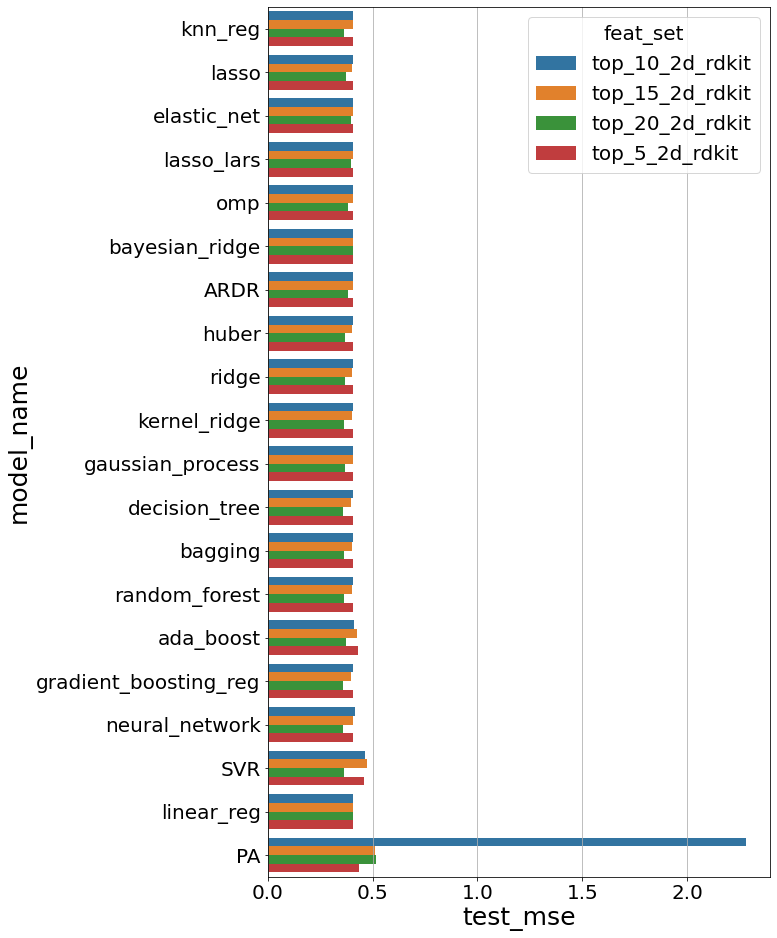

In [96]:
plt.figure(figsize=(9,16))
df=df.sort_values(by='feat_set')
sns.barplot(x='test_mse',y='model_name',data=df,hue='feat_set')

In [97]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
feat_type='3d'
file_name=f'TOP_5_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
file_name=f'TOP_10_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
file_name=f'TOP_15_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
file_name=f'TOP_20_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df

File Found
File Found
File Found
File Found


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,top_5_3d_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...","LinearRegression(normalize=True, positive=True)","{'fit_intercept': True, 'normalize': True, 'po...","{'fit_time': [0.004273414611816406, 0.00632429...",-0.000321,0.357643,0.483241,0.348028,0.314764,0.457623,0.053330,0.385847,0.530571,"[-1.3685022008664922, -1.589407052392601, -1.5...","[-1.589407052392601, -1.589407052392601, -1.57..."
1,top_5_3d_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=500, solver='saga')","{'alpha': 1.5, 'max_iter': 500, 'solver': 'sag...","{'fit_time': [0.004673957824707031, 0.00431942...",-0.341230,0.424623,0.495614,0.347897,0.314827,0.458277,0.052691,0.386108,0.531277,"[-1.3688423953590179, -1.5878645720595714, -1....","[-1.5878645720595714, -1.5878645720595714, -1...."
2,top_5_3d_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=100, positive=True)","{'alpha': 0.01, 'max_iter': 100, 'positive': T...","{'fit_time': [0.004592180252075195, 0.00538969...",0.015889,0.355134,0.485159,0.347538,0.315000,0.459715,0.056409,0.384592,0.531302,"[-1.3690007729047666, -1.5831532657492442, -1....","[-1.5831532657492442, -1.5831532657492442, -1...."
3,top_5_3d_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.005108356475830078, 0.00300836...",-0.005607,0.387708,0.530437,0.253819,0.360247,0.513444,0.037623,0.392249,0.557197,"[-1.3846064387961063, -1.4995984058762306, -1....","[-1.4995984058762306, -1.4995984058762306, -1...."
4,top_5_3d_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.003381490707397461, 0.00343966...",0.019941,0.370192,0.514309,0.290553,0.342512,0.497455,0.027286,0.396462,0.555479,"[-1.3706107573571342, -1.5230612276857796, -1....","[-1.5230612276857796, -1.5230612276857796, -1...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,top_20_3d_rdkit,random_forest,"GridSearchCV(cv=10, estimator=RandomForestRegr...","(DecisionTreeRegressor(max_features='auto', ra...","{'bootstrap': True, 'n_estimators': 200, 'oob_...","{'fit_time': [0.36342477798461914, 0.369911909...",0.733283,0.088471,0.201999,0.978278,0.010487,0.070101,0.869851,0.053047,0.171259,"[-0.5490999999999993, -1.830300000000002, -1.3...","[-1.2610999999999997, -2.231999999999996, -0.6..."
16,top_20_3d_rdkit,ada_boost,"GridSearchCV(cv=10, estimator=AdaBoostRegresso...","(DecisionTreeRegressor(max_depth=3, random_sta...","{'learning_rate': 1.5, 'loss': 'square', 'n_es...","{'fit_time': [0.3940434455871582, 0.3824720382...",0.741360,0.085080,0.219559,0.912917,0.042043,0.163202,0.792830,0.084439,0.231630,"[-0.4466666666666666, -1.8433333333333335, -1....","[-1.3646874999999996, -2.0444444444444443, -0...."
17,top_20_3d_rdkit,gradient_boosting_reg,"GridSearchCV(cv=10, estimator=GradientBoosting...",([DecisionTreeRegressor(criterion='friedman_ms...,"{'max_depth': 2, 'n_estimators': 100, 'tol': 0...","{'fit_time': [0.04840087890625, 0.044569969177...",0.776782,0.074801,0.198889,0.950668,0.023817,0.102500,0.860669,0.056789,0.184539,"[-0.5673697772592718, -1.7776318325479246, -1....","[-1.2748308076216934, -2.084018320314556, -0.8..."
18,top_20_3d_rdkit,neural_network,"GridSearchCV(cv=10,\n estimator=ML...","MLPRegressor(hidden_layer_sizes=(50, 30, 20), ...","{'activation': 'relu', 'early_stopping': False...","{'fit_time': [0.07790303230285645, 0.081609487...",0.582324,0.147423,0.278429,0.885101,0.055472,0.164339,0.731912,0.109268,0.248421,"[-0.3595691729277821, -1.552599709909872, -1.3...","[-1.49

<AxesSubplot:xlabel='test_mse', ylabel='model_name'>

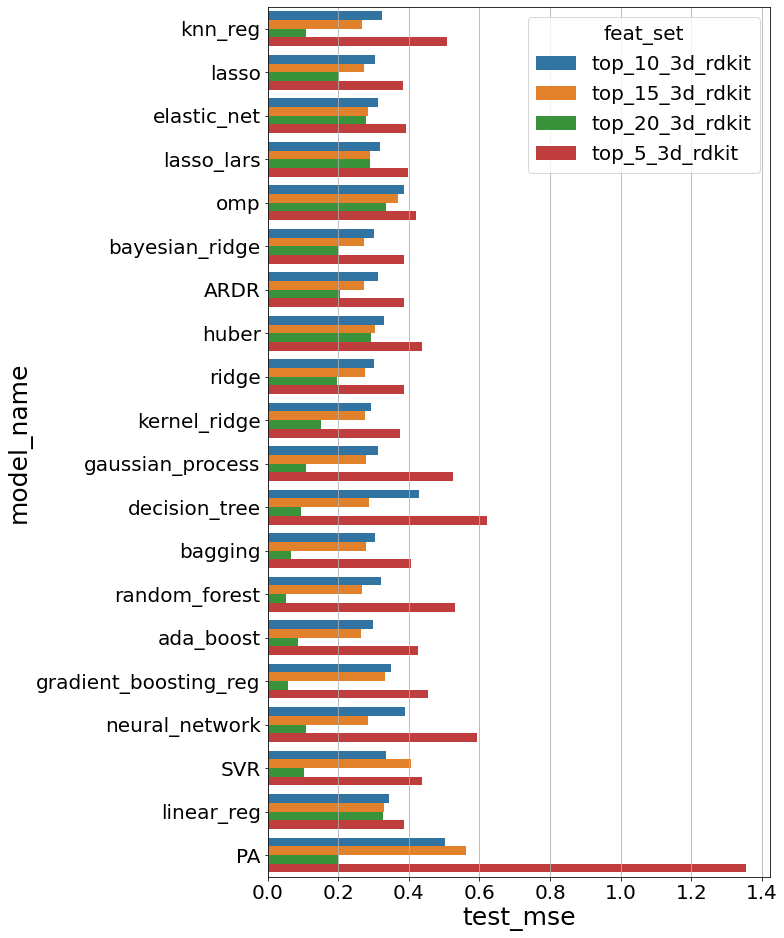

In [98]:
plt.figure(figsize=(9,16))
df=df.sort_values(by='feat_set')
sns.barplot(x='test_mse',y='model_name',data=df,hue='feat_set')

In [99]:
# TOP_FEAT_MODEL_PERFORMANCE_DATA_DF_rdkit.pkl
feat_type='fp_deepchem'
file_name=f'TOP_5_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df1=getDataFromFile(file_name)
file_name=f'TOP_10_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df2=getDataFromFile(file_name)
file_name=f'TOP_15_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df3=getDataFromFile(file_name)
file_name=f'TOP_20_FEAT_MODEL_PERFORMANCE_DF_{feat_type}_{LIBRARY}.pkl'
df4=getDataFromFile(file_name)
df=pd.concat([df1,df2,df3,df4])
df

File Found
File Found
File Found
File Found


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,top_5_fp_deepchem_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...","LinearRegression(normalize=True, positive=True)","{'fit_intercept': True, 'normalize': True, 'po...","{'fit_time': [0.004229307174682617, 0.00441360...",0.664049,0.132625,0.267547,0.750229,0.120586,0.255600,0.675143,0.132406,0.267272,"[-0.6679411764705867, -1.8982894736842115, -0....","[-1.8982894736842115, -1.8982894736842115, -0...."
1,top_5_fp_deepchem_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=0.5, max_iter=500, solver='saga')","{'alpha': 0.5, 'max_iter': 500, 'solver': 'sag...","{'fit_time': [0.005614042282104492, 0.00356149...",0.669608,0.132287,0.268465,0.749190,0.121088,0.256985,0.683663,0.128934,0.260939,"[-0.6854606298681576, -1.8805230969399767, -0....","[-1.8805230969399767, -1.8805230969399767, -0...."
2,top_5_fp_deepchem_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=100, positive=True,...","{'alpha': 0.01, 'max_iter': 100, 'positive': T...","{'fit_time': [0.00650334358215332, 0.004842758...",0.665612,0.135005,0.272972,0.742479,0.124328,0.263063,0.688682,0.126888,0.258949,"[-0.7058823543419397, -1.8538749994046761, -0....","[-1.8538749994046761, -1.8538749994046761, -0...."
3,top_5_fp_deepchem_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.0039064884185791016, 0.0052654...",-0.096442,0.437802,0.557998,0.123073,0.423369,0.549045,0.092916,0.369713,0.542039,"[-1.2959032610454768, -1.4596767276258296, -1....","[-1.4596767276258296, -1.4596767276258296, -1...."
4,top_5_fp_deepchem_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100, positive=T...","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.0070874691009521484, 0.0052707...",0.616160,0.162632,0.298655,0.678131,0.155394,0.292525,0.654024,0.141014,0.276665,"[-0.8577940606916589, -1.7467287620831728, -0....","[-1.7467287620831728, -1.7467287620831728, -0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,top_20_fp_deepchem_rdkit,random_forest,"GridSearchCV(cv=10, estimator=RandomForestRegr...","(DecisionTreeRegressor(max_features='auto', ra...","{'bootstrap': True, 'n_estimators': 50, 'oob_s...","{'fit_time': [0.08304667472839355, 0.070875883...",0.707446,0.120091,0.223121,0.792994,0.099940,0.199064,0.671358,0.133949,0.237630,"[-0.6778894953868663, -1.7791333067096309, -0....","[-1.5607823809523809, -2.015482047709063, -0.4..."
16,top_20_fp_deepchem_rdkit,ada_boost,"GridSearchCV(cv=10, estimator=AdaBoostRegresso...","(DecisionTreeRegressor(max_depth=3, random_sta...","{'learning_rate': 1.5, 'loss': 'linear', 'n_es...","{'fit_time': [0.014612197875976562, 0.01124525...",0.626793,0.143712,0.263930,0.762576,0.114625,0.241733,0.667381,0.135570,0.262585,"[-0.772222222222222, -1.906923076923078, -0.89...","[-1.5685714285714287, -1.906923076923078, -0.3..."
17,top_20_fp_deepchem_rdkit,gradient_boosting_reg,"GridSearchCV(cv=10, estimator=GradientBoosting...",([DecisionTreeRegressor(criterion='friedman_ms...,"{'max_depth': 10, 'n_estimators': 50, 'tol': 0...","{'fit_time': [0.03575301170349121, 0.025242567...",0.707921,0.119615,0.223409,0.794848,0.099045,0.194042,0.677347,0.131508,0.236664,"[-0.6717991403041335, -1.780258475978599, -0.9...","[-1.5542862620614046, -2.010050188794551, -0.4..."
18,top_20_fp_deepchem_rdkit,neural_network,"GridSearchCV(cv=10,\n estimator=ML...","MLPRegressor(hidden_layer_sizes=(50, 30, 20), ...","{'activation': 'relu', 'early_stopping': False...","{'fit_time': [0.1746981143951416, 0.1072642803...",0.707747,0.117565,0.220808,0.793441,0.099724,0.199704,0.67

<AxesSubplot:xlabel='test_mse', ylabel='model_name'>

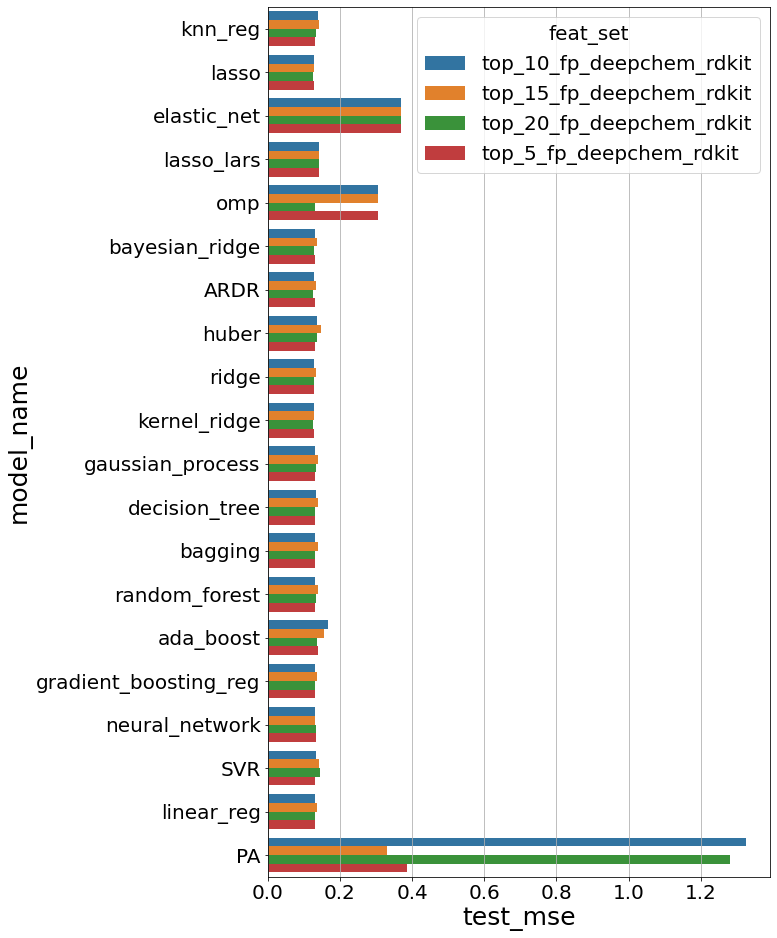

In [100]:
plt.figure(figsize=(9,16))
df=df.sort_values(by='feat_set')
sns.barplot(x='test_mse',y='model_name',data=df,hue='feat_set')

# Model Error per Class of Compound and Every Comound (top 3 models) - 3 models in 2d+3d+fp, 2d, 3d, fp

In [112]:
file_name=f'MODEL_PERFORMANCE_DF_2d+3d+fp_{LIBRARY}.pkl'
df=getDataFromFile(file_name)
df

File Found


,feat_set,model_name,gs_obj,opt_model,opt_params,cv_score_obj,cv_mean_test_r2,cv_mean_test_mse,cv_mean_test_mae,train_r2,train_mse,train_mae,test_r2,test_mse,test_mae,pred_train,pred_test
0,2d+3d+fp_rdkit,linear_reg,"GridSearchCV(cv=10, estimator=LinearRegression...",LinearRegression(),"{'fit_intercept': True, 'normalize': False, 'p...","{'fit_time': [0.14142060279846191, 0.154308319...",0.968083,0.009708,0.062823,1.000000,2.334106e-30,1.113047e-15,0.989772,0.004169,0.042151,"[-0.5799999999999937, -1.8699999999999997, -1....","[-1.6010139961165957, -2.248286582838187, -0.6..."
1,2d+3d+fp_rdkit,ridge,"GridSearchCV(cv=10, estimator=Ridge(), n_jobs=...","Ridge(alpha=1.5, max_iter=5000, solver='saga')","{'alpha': 1.5, 'max_iter': 5000, 'solver': 'sa...","{'fit_time': [3.8680825233459473, 3.5826566219...",0.973266,0.007766,0.055787,0.998680,6.374300e-04,1.613212e-02,0.991286,0.003552,0.039159,"[-0.5986321537764605, -1.845142478443837, -1.3...","[-1.6037680800963638, -2.240615718104971, -0.6..."
2,2d+3d+fp_rdkit,lasso,"GridSearchCV(cv=10, estimator=Lasso(), n_jobs=...","Lasso(alpha=0.01, max_iter=200, positive=True)","{'alpha': 0.01, 'max_iter': 200, 'positive': T...","{'fit_time': [0.13209843635559082, 0.237755060...",0.980708,0.005787,0.055394,0.992954,3.401937e-03,4.297650e-02,0.990779,0.003758,0.047393,"[-0.6030660767482522, -1.844123584335192, -1.3...","[-1.5144248061492083, -2.17215109435767, -0.69..."
3,2d+3d+fp_rdkit,elastic_net,"GridSearchCV(cv=10, estimator=ElasticNet(), n_...","ElasticNet(alpha=0.5, l1_ratio=0.2, max_iter=5...","{'alpha': 0.5, 'l1_ratio': 0.2, 'max_iter': 50...","{'fit_time': [0.22015810012817383, 0.180590391...",0.911817,0.031395,0.144293,0.951309,2.350735e-02,1.276061e-01,0.935005,0.026491,0.138904,"[-0.7430103027373084, -1.7675425164299052, -1....","[-1.5167128827464031, -1.9187279708487472, -0...."
4,2d+3d+fp_rdkit,lasso_lars,"GridSearchCV(cv=10, estimator=LassoLars(), n_j...","LassoLars(alpha=0.01, max_iter=100)","{'alpha': 0.01, 'jitter': None, 'max_iter': 10...","{'fit_time': [0.0632321834564209, 0.0524141788...",0.933680,0.024419,0.127584,0.952211,2.307195e-02,1.238846e-01,0.940524,0.024242,0.129771,"[-0.7063253205775352, -1.7647783163780975, -1....","[-1.5903850212523705, -1.94458819686808, -0.84..."
5,2d+3d+fp_rdkit,omp,"GridSearchCV(cv=10, estimator=OrthogonalMatchi...",OrthogonalMatchingPursuit(),{},"{'fit_time': [0.07396697998046875, 0.100767850...",0.103019,0.365260,0.225831,1.000000,1.264036e-29,2.254898e-15,0.938386,0.025113,0.119003,"[-0.5800000000000007, -1.8700000000000048, -1....","[-1.5570230366173643, -2.256478326230281, -0.5..."
6,2d+3d+fp_rdkit,bayesian_ridge,"GridSearchCV(cv=10, estimator=BayesianRidge(),...","BayesianRidge(alpha_1=1e-07, alpha_2=1e-05, la...","{'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1...","{'fit_time': [0.7413012981414795, 1.0354070663...",0.971494,0.008480,0.057867,0.999283,3.463749e-04,1.170593e-02,0.991654,0.003402,0.038116,"[-0.5902395477691504, -1.850201346727125, -1.3...","[-1.596677029166602, -2.236724629745552, -0.65..."
7,2d+3d+fp_rdkit,ARDR,"GridSearchCV(cv=10, estimator=ARDRegression(),...","ARDRegression(lambda_1=1e-07, n_iter=200)","{'alpha_1': 1e-06, 'lambda_1': 1e-07, 'n_iter'...","{'fit_time': [0.9188745021820068, 1.6390917301...",0.973846,0.007921,0.057448,0.999939,2.965003e-05,3.926575e-03,0.979750,0.008253,0.056587,"[-0.5689871878931704, -1.8766339043071296, -1....","[-1.5353492444817052, -2.263711032068989, -0.6..."
8,2d+3d+fp_rdkit,PA,"GridSearchCV(cv=10, estimator=PassiveAggressiv...","PassiveAggressiveRegressor(C=0.5, max_iter=150...","{'C': 0.5, 'max_iter': 1500, 'tol': 1e-07}","{'fit_time': [0.16043615341186523, 0.149175405...",0.875961,0.033008,0.108104,0.991256,4.221272e-03,5.593183e-02,0.961383,0.015740,0.099066,"[-0.5703458001435279, -1.7920920552040207, -1....","[-1.7010659088914193, -2.2098678475910964, -0...."
9,2d+3d+fp_rdkit,huber,"GridSearchCV(cv=10,\n estimator=Hu...","HuberRegressor(alpha=0.001, epsilon=1, max_ite...","{'

In [136]:
rank=0
best_model_row=df.sort_values(by='test_mse').iloc[rank,:]
best_model=best_model_row['opt_model']
best_model_name=best_model_row['model_name']

df_train=pd.DataFrame()
df_train['Sr. No.']=data_train['Sr. No.']
df_train['FG_name']=data_train['FG_name']
df_train['true_y']=y_train
df_train['pred_y']=best_model_row['pred_train']
df_train['abs_error']=np.abs(df_train['true_y']-df_train['pred_y'])
df_train['%abs_error']=df_train['abs_error']*100/np.abs(df_train['true_y'])
gb_train=df_train.groupby('FG_name').mean()
gb_train=gb_train.rename(columns=lambda x:'mean_'+x)
gb_train=gb_train.sort_values(by='mean_%abs_error')
gb_train=gb_train.reset_index()
gb_train

,FG_name,mean_true_y,mean_pred_y,mean_abs_error,mean_%abs_error
0,-,-1.740000,-1.739801,0.000199,0.011434
1,CHO,-1.500000,-1.499809,0.000191,0.012741
2,F,-1.655000,-1.655037,0.000335,0.020296
3,COCH3,-1.565000,-1.564639,0.000361,0.023266
4,COOH,-1.530000,-1.530411,0.000411,0.026840
5,P(CH3)2,-1.745000,-1.744787,0.000671,0.038461
6,Cl,-1.610000,-1.610630,0.000630,0.039107
7,CF3,-1.540000,-1.540065,0.000604,0.039257
8,CH2=CH,-1.730000,-1.728913,0.001087,0.062823
9,CONH2,-1.520000,-1.521119,0.001119,0.073626


In [138]:
df_test=pd.DataFrame()
df_test['Sr. No.']=data_test['Sr. No.']
df_test['FG_name']=data_test['FG_name']
df_test['true_y']=y_test
df_test['pred_y']=best_model_row['pred_test']
df_test['abs_error']=np.abs(df_test['true_y']-df_test['pred_y'])
df_test['%abs_error']=df_test['abs_error']*100/np.abs(df_test['true_y'])
gb_test=df_test.groupby('FG_name').mean()
gb_test=gb_test.rename(columns=lambda x:'mean_'+x)
gb_test=gb_test.sort_values(by='mean_%abs_error')
gb_test=gb_test.reset_index()
gb_test

,FG_name,mean_true_y,mean_pred_y,mean_abs_error,mean_%abs_error
0,OCH3,-1.805000,-1.815209,0.010209,0.580844
1,CH2=CH,-1.720000,-1.706992,0.013008,0.756254
2,CH3,-1.790000,-1.767538,0.022462,1.254833
3,NH2,-2.161429,-2.152801,0.030594,1.433254
4,CHO,-1.510000,-1.486916,0.023084,1.528761
5,OH,-1.812222,-1.783285,0.038594,2.092134
6,C6H5,-1.730000,-1.679285,0.050715,2.931524
7,Cl,-1.630000,-1.680231,0.050231,3.081643
8,CONH2,-1.630000,-1.543167,0.086833,5.327162
9,CN,-0.785714,-0.778230,0.024014,7.812052


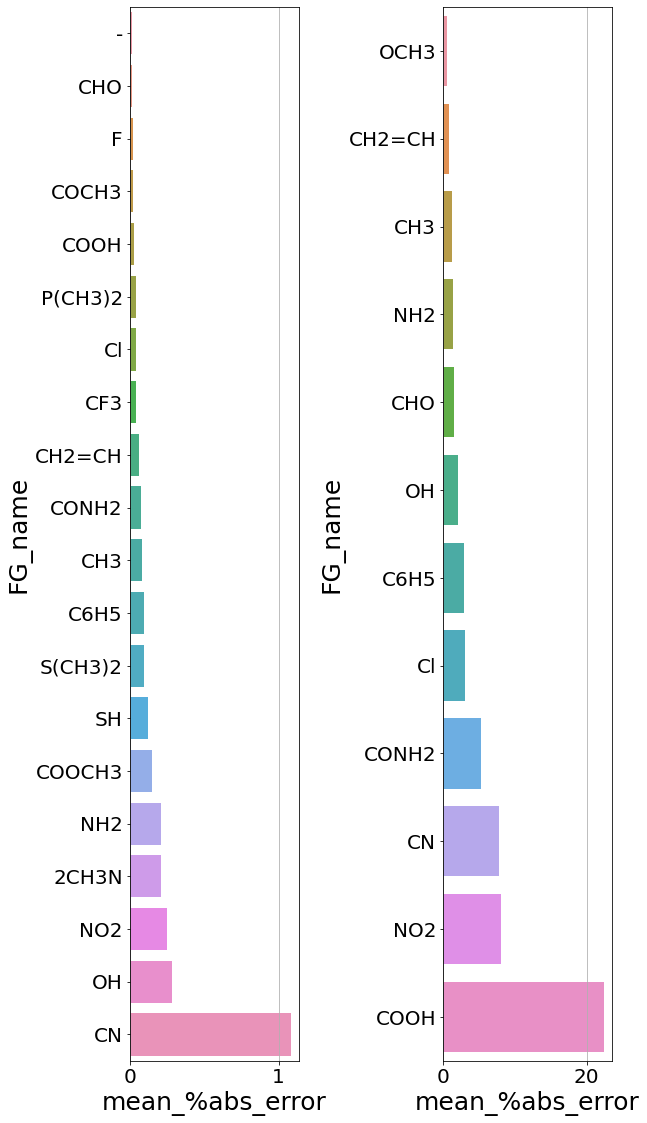

In [140]:
fig, axes = plt.subplots(1, 2, figsize=(9, 16))
sns.barplot(ax=axes[0],x='mean_%abs_error',y='FG_name',data=gb_train)
sns.barplot(ax=axes[1],x='mean_%abs_error',y='FG_name',data=gb_test)
plt.tight_layout()

In [143]:
set(gb_test['FG_name'])-set(gb_train['FG_name'])

{'OCH3'}

In [159]:
df=pd.concat([data_train,data_test])
print(df['FG_name'].nunique())
df['FG_name'].value_counts().to_frame()

21


,FG_name
NH2,50
CN,49
OH,28
NO2,25
F,2
COCH3,2
Cl,2
COOH,2
SH,2
CH3,2


In [164]:
fg_count_train=data_train['FG_name'].value_counts().to_frame().\
reset_index().rename(columns={'index':'FG_name','FG_name':'train_count'})
fg_count_train

,FG_name,train_count
0,NH2,36
1,CN,35
2,OH,19
3,NO2,15
4,COOCH3,2
5,F,2
6,S(CH3)2,2
7,CF3,2
8,SH,2
9,2CH3N,2


In [165]:
fg_count_test=data_test['FG_name'].value_counts().to_frame().\
reset_index().rename(columns={'index':'FG_name','FG_name':'test_count'})
fg_count_test

,FG_name,test_count
0,CN,14
1,NH2,14
2,NO2,10
3,OH,9
4,OCH3,2
5,COOH,1
6,Cl,1
7,CH2=CH,1
8,CH3,1
9,C6H5,1


In [169]:
df=pd.DataFrame()
df['FG_name']=pd.concat([data_train,data_test])['FG_name']
df=df['FG_name'].value_counts().to_frame().\
reset_index().rename(columns={'index':'FG_name','FG_name':'total_count'})
df=df.merge(fg_count_train,how='left',on='FG_name')
df=df.merge(fg_count_test,how='left',on='FG_name')
df=df.fillna(0)
df

,FG_name,total_count,train_count,test_count
0,NH2,50,36.0,14.0
1,CN,49,35.0,14.0
2,OH,28,19.0,9.0
3,NO2,25,15.0,10.0
4,F,2,2.0,0.0
5,COCH3,2,2.0,0.0
6,Cl,2,1.0,1.0
7,COOH,2,1.0,1.0
8,SH,2,2.0,0.0
9,CH3,2,1.0,1.0


In [172]:
fg_count_train=data_train['FG_name'].value_counts().to_frame().\
reset_index().rename(columns={'index':'FG_name','FG_name':'count'})
fg_count_train['label']='train'
fg_count_test=data_test['FG_name'].value_counts().to_frame().\
reset_index().rename(columns={'index':'FG_name','FG_name':'count'})
fg_count=pd.concat([fg_count_train,fg_count_test])
fg_count_test['label']='test'
fg_count=pd.concat([fg_count_train,fg_count_test])
fg_count

,FG_name,count,label
0,NH2,36,train
1,CN,35,train
2,OH,19,train
3,NO2,15,train
4,COOCH3,2,train
5,F,2,train
6,S(CH3)2,2,train
7,CF3,2,train
8,SH,2,train
9,2CH3N,2,train


<AxesSubplot:xlabel='count', ylabel='FG_name'>

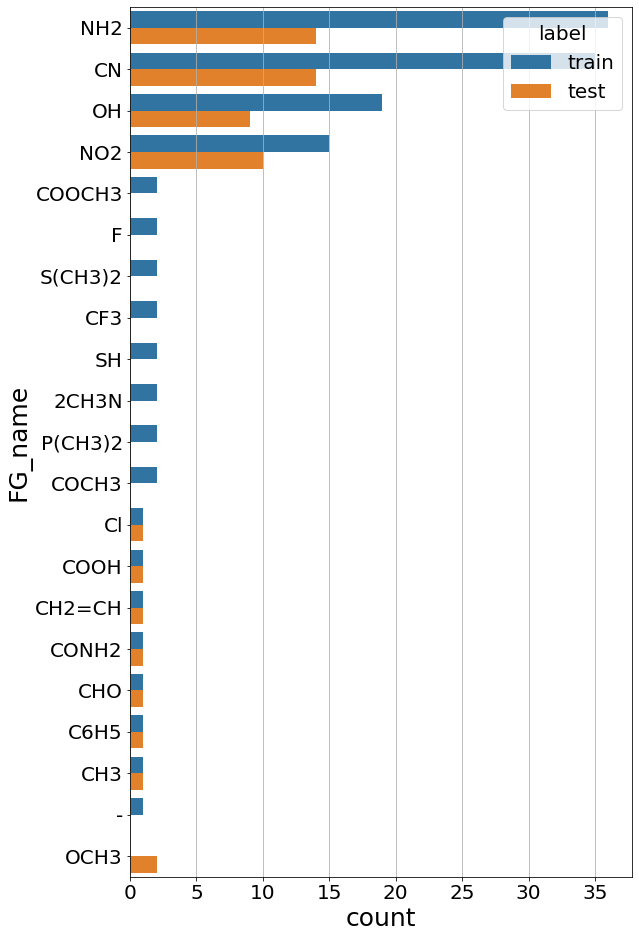

In [174]:
plt.figure(figsize=(9,16))
sns.barplot(x='count',y='FG_name',data=fg_count,hue='label')

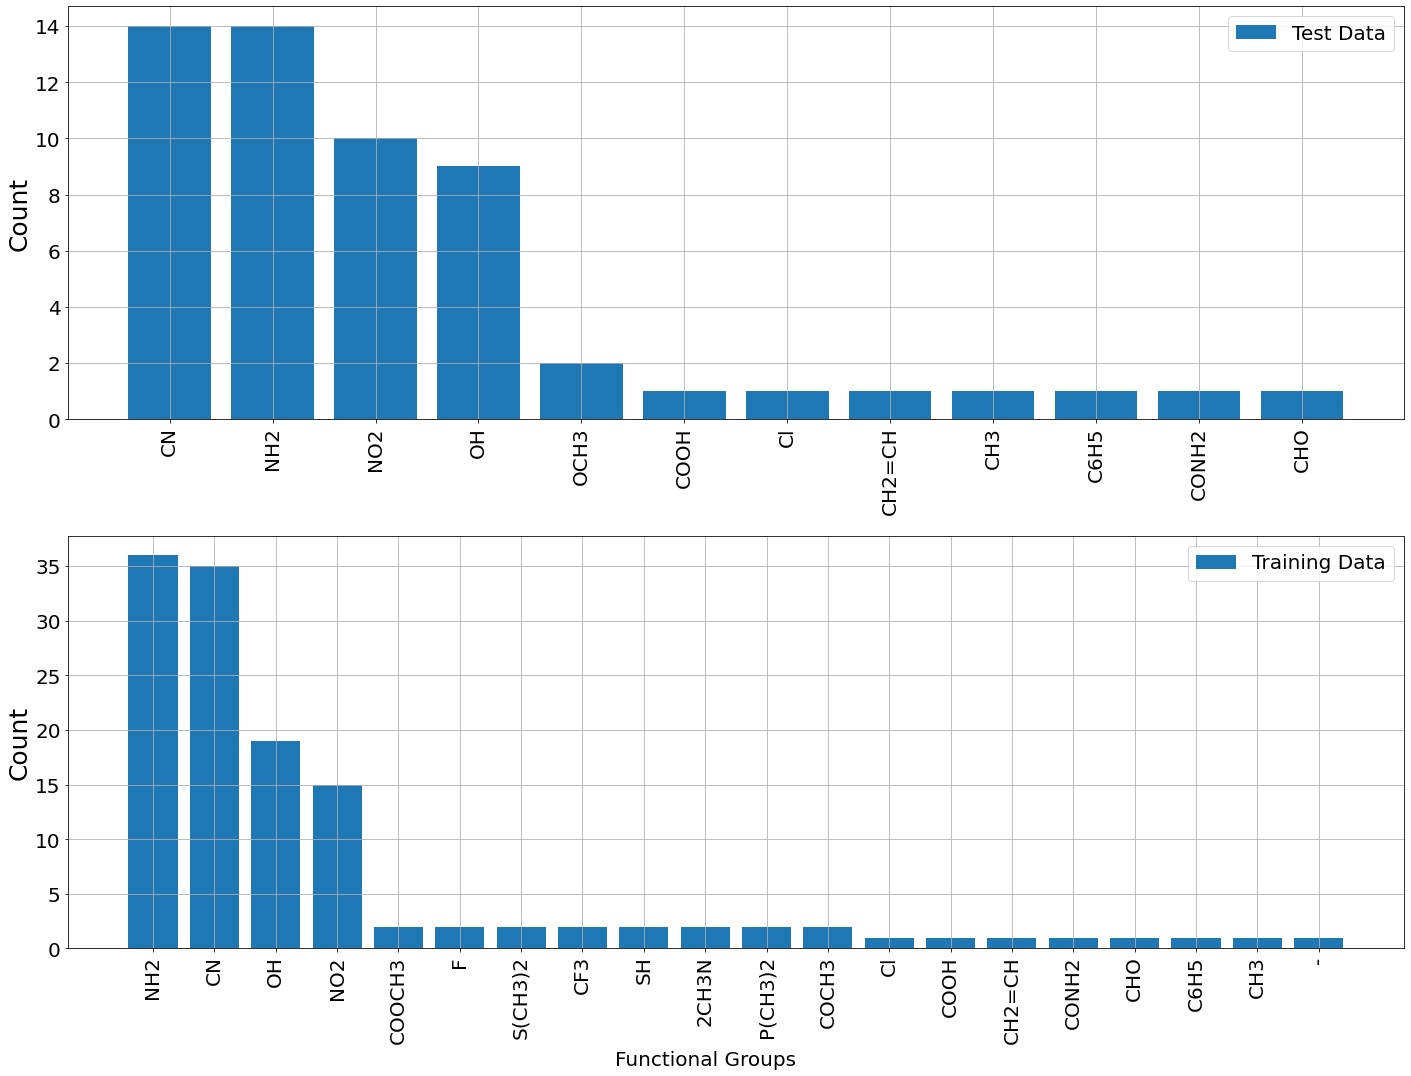

In [141]:
# BEST_MODEL_ERROR_PER_COMPOUND_TRAIN_rdkit.pkl
train_dist=data_train['FG_name'].value_counts()
test_dist=data_test['FG_name'].value_counts()

fig,(ax1,ax2)=plt.subplots(2,1,figsize=(20,15))

ax1.bar(test_dist.index,test_dist,label='Test Data')
ax2.bar(train_dist.index,train_dist,label='Training Data')

ax1.tick_params(axis='x', rotation=90)
ax2.tick_params(axis='x', rotation=90)
ax1.legend()
ax1.set_ylabel('Count')
ax2.legend()
ax2.set_ylabel('Count')
fig.text(0.5, 0, 'Functional Groups', ha='center', rotation='horizontal')
plt.tight_layout()